# Main Goal with OWID Datasets
- Main goal is to predict the aftermath of covid19 in the near future in different countries and the United States
- Select countries with 50+% vaccination rate today
 - draw MA of the countries' covid cases 
   - at ~60MA if slope > 0, then covid case might on the verge of increasing

## Sub-Goal
- Find interesting factors regarding age, smoking, diabetes, gender, hdi, etc. to covid cases along the way

In [179]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [348]:
#Read the data
file_path = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df_owid = pd.read_csv(file_path, error_bad_lines=False)
df_owid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113840,ZWE,Africa,Zimbabwe,2021-08-29,124437.0,70.0,255.000,4401.0,11.0,21.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
113841,ZWE,Africa,Zimbabwe,2021-08-30,124581.0,144.0,225.714,4416.0,15.0,17.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
113842,ZWE,Africa,Zimbabwe,2021-08-31,124773.0,192.0,207.571,4419.0,3.0,14.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
113843,ZWE,Africa,Zimbabwe,2021-09-01,124960.0,187.0,178.429,4438.0,19.0,14.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [308]:
#dividing into separate dataframes per columns
id = df_owid.loc[:, "iso_code":"date"]

cases = pd.concat([id, df_owid.loc[:, "total_cases":"new_cases_smoothed_per_million"]], axis=1)

deaths = pd.concat([id, df_owid.loc[:, "total_deaths":"new_deaths_smoothed_per_million"]], axis=1)

hospital = pd.concat([id, df_owid.loc[:, "icu_patients":"weekly_hosp_admissions_per_million"]], axis=1)

policy = pd.concat([id, df_owid["stringency_index"]], axis=1)

tests = pd.concat([id, df_owid.loc[:, "total_tests":"tests_units"]], axis=1)

vacc = pd.concat([id, df_owid.loc[:, "total_vaccinations":"new_vaccinations_smoothed_per_million"]], axis=1)

others = pd.concat([id,df_owid.loc[:, "iso_code":"excess_mortality"]], axis=1)

In [ ]:
#What countries are there?
location = df_owid["location"].drop_duplicates()
location.to_list()

# Countries with at least 50% vaccination (1st dose)
- Would use *people_vaccinated_per_hundred*
    - Total number of people who received at least one vaccine dose per 100 people in the total population

In [349]:
#Querying people_vaccinated_per_hundred final values for each country
people_vaccinated_per_hundred = pd.concat([id, df_owid["people_vaccinated_per_hundred"].to_frame()], axis=1)
each_country_people_vaccinated_per_hundred = people_vaccinated_per_hundred.dropna().drop_duplicates(subset="location", keep="last")
each_country_people_vaccinated_per_hundred

,iso_code,continent,location,date,people_vaccinated_per_hundred
554,AFG,Asia,Afghanistan,2021-08-31,1.94
1674,ALB,Europe,Albania,2021-08-31,28.28
2223,DZA,Africa,Algeria,2021-08-26,7.67
2768,AND,Europe,Andorra,2021-08-23,65.99
3305,AGO,Africa,Angola,2021-08-30,3.02
...,...,...,...,...,...
109833,VAT,Europe,Vatican,2021-07-19,9.32
110928,VNM,Asia,Vietnam,2021-06-21,20.92
112250,YEM,Asia,Yemen,2021-08-31,31.32
112741,ZMB,Africa,Zambia,2021-07-21,0.98


In [296]:
#Selecting countries with 50+% first doses
each_country_people_vaccinated_per_hundred[each_country_people_vaccinated_per_hundred['people_vaccinated_per_hundred']>50]

,iso_code,continent,location,date,people_vaccinated_per_hundred
2760,AND,Europe,Andorra,2021-08-15,65.99
3504,AIA,North America,Anguilla,2021-08-20,62.76
4649,ARG,South America,Argentina,2021-08-30,60.95
5354,ABW,North America,Aruba,2021-08-30,73.23
7079,AUT,Europe,Austria,2021-08-30,60.77
...,...,...,...,...,...
105091,TCA,North America,Turks and Caicos Islands,2021-08-13,65.32
106793,ARE,Asia,United Arab Emirates,2021-08-26,84.93
107375,GBR,Europe,United Kingdom,2021-08-29,70.41
107964,USA,North America,United States,2021-08-30,60.88


# Andorra

In [316]:
#when did Andorra's vaccination pass 50%?
people_vaccinated_per_hundred[people_vaccinated_per_hundred["location"]=="Andorra"].dropna()
#Andorra's vaccinateion rate surpassed 50% as of 2021-06-21

,iso_code,continent,location,date,people_vaccinated_per_hundred
2558,AND,Europe,Andorra,2021-01-25,0.74
2565,AND,Europe,Andorra,2021-02-01,1.34
2574,AND,Europe,Andorra,2021-02-10,1.67
2576,AND,Europe,Andorra,2021-02-12,2.10
2583,AND,Europe,Andorra,2021-02-19,2.77
2588,AND,Europe,Andorra,2021-02-24,3.09
2600,AND,Europe,Andorra,2021-03-08,3.15
2602,AND,Europe,Andorra,2021-03-10,4.72
2607,AND,Europe,Andorra,2021-03-15,9.18
2628,AND,Europe,Andorra,2021-04-05,12.64


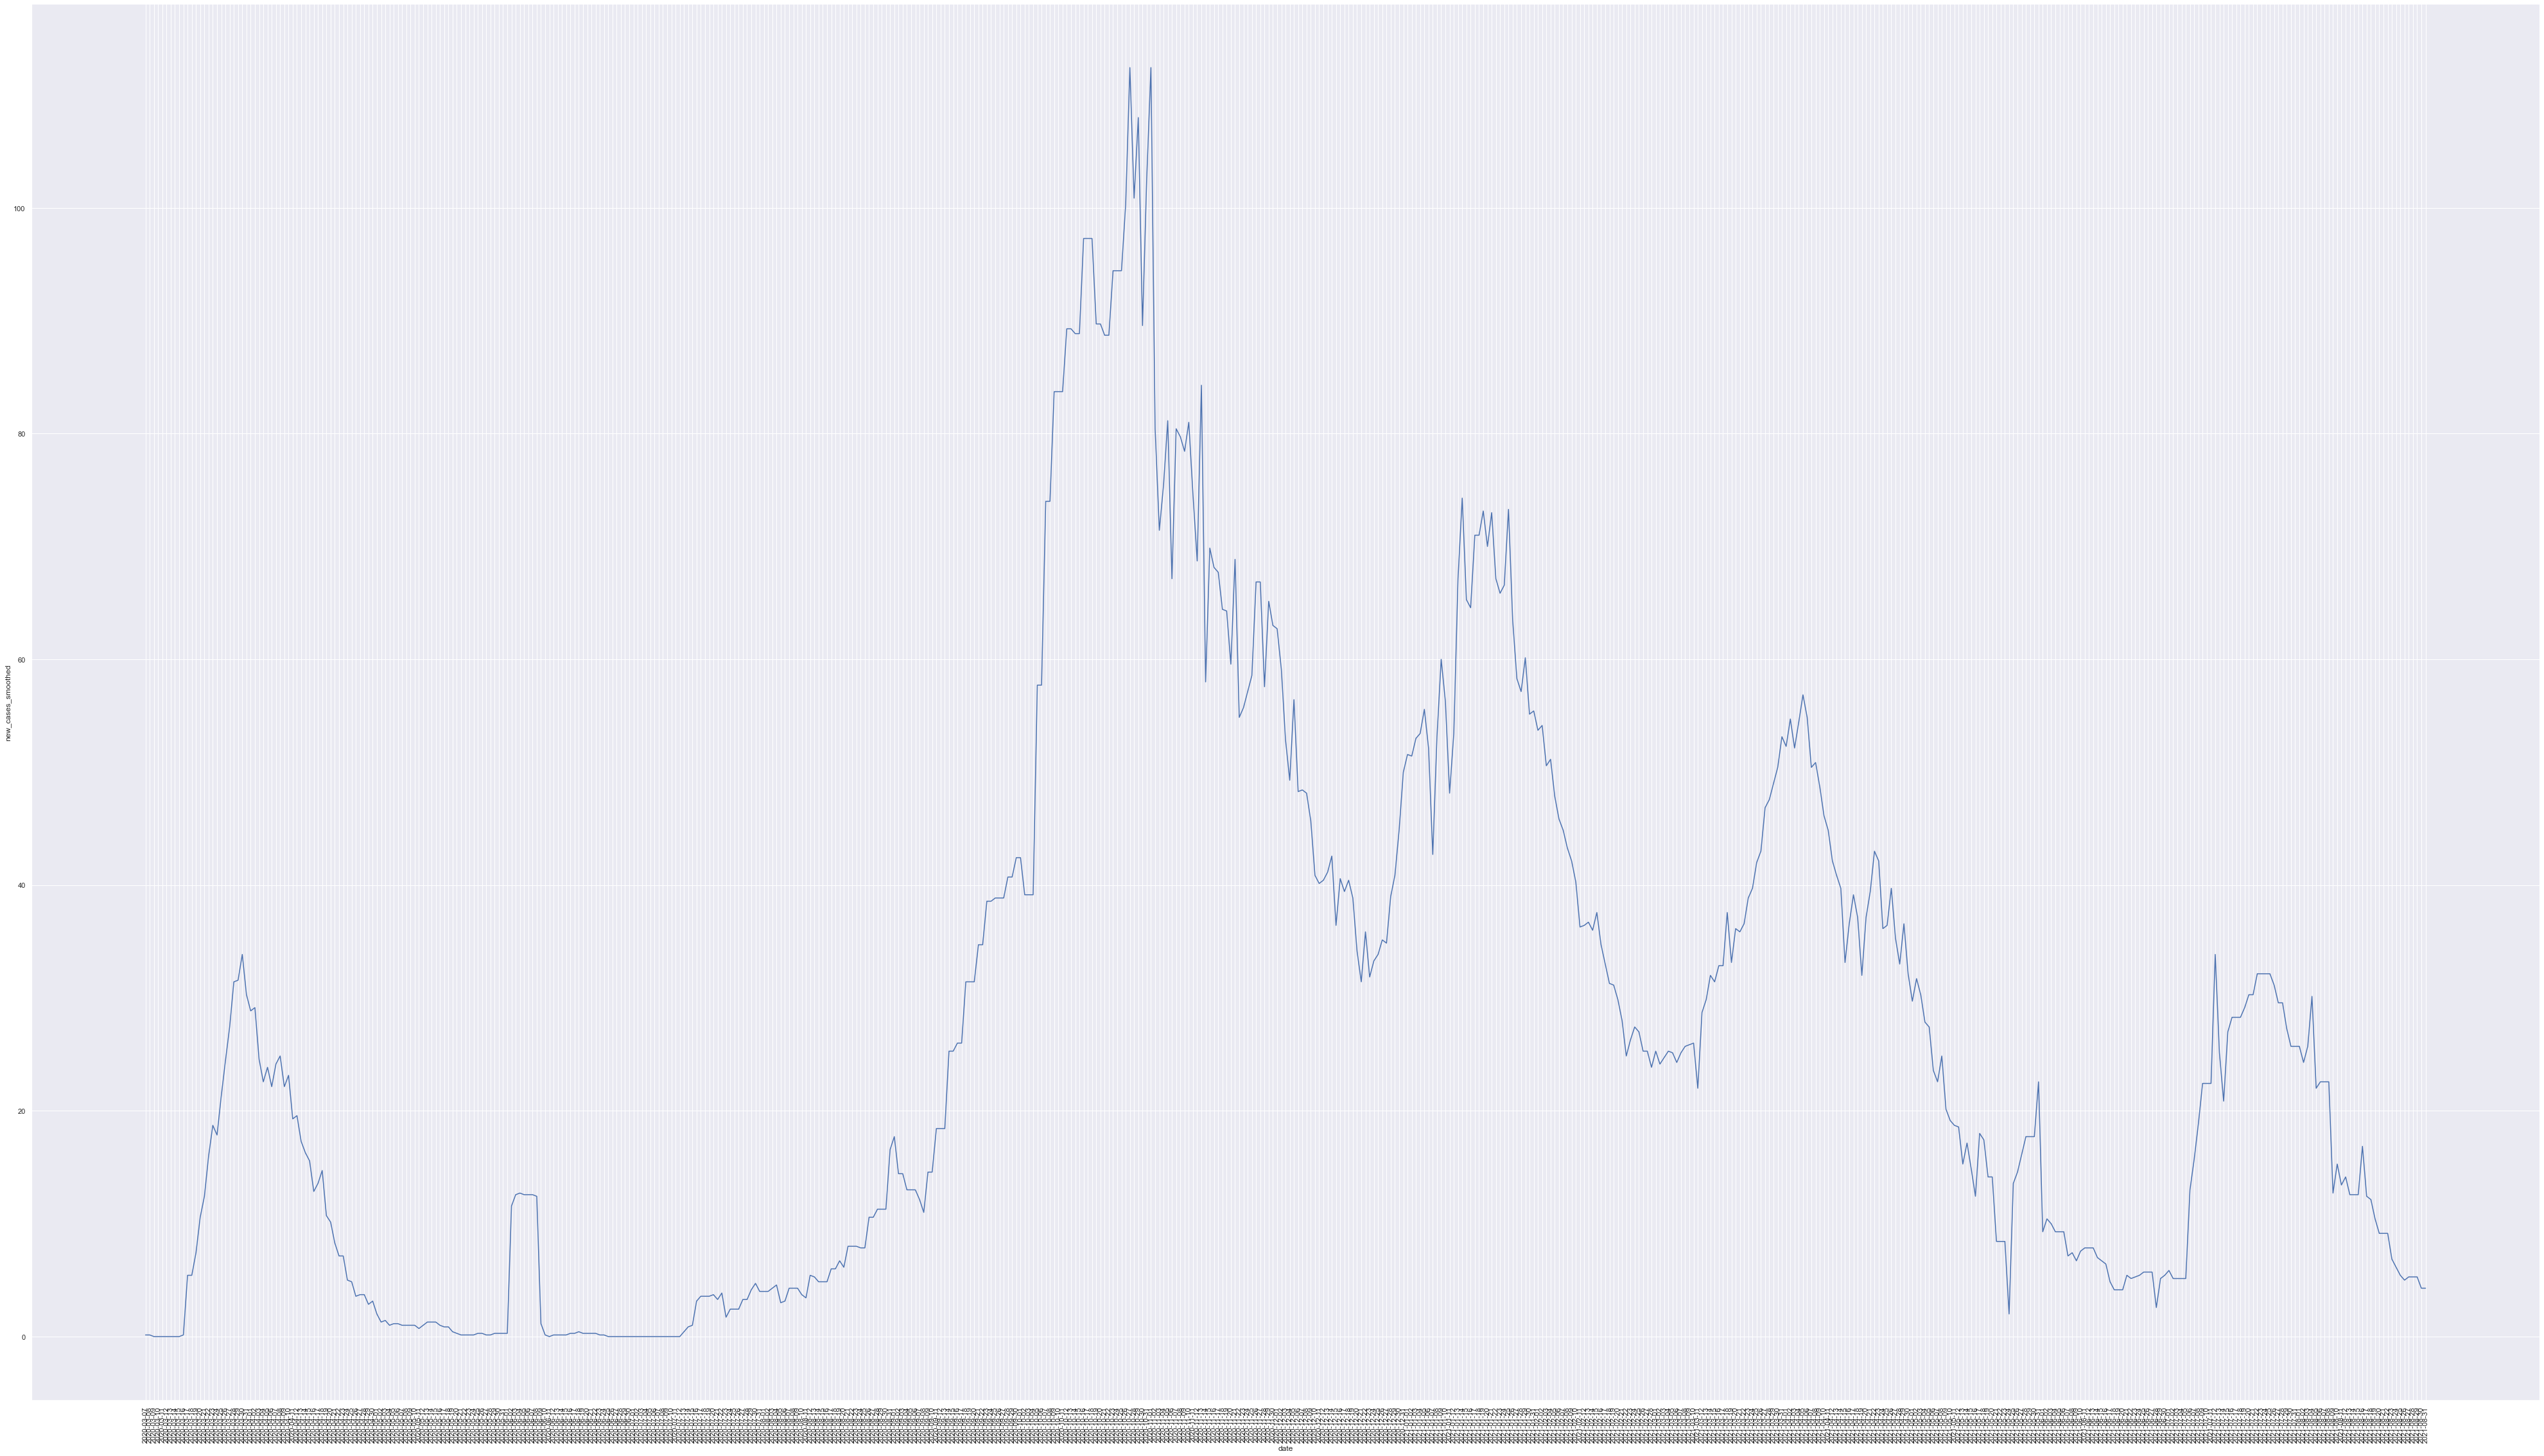

In [319]:
#Lets plot new_cases_smooth for Andorra
cases_andorra = cases[cases['location']=="Andorra"]
sns.set(rc={'figure.figsize':(70,40)})
sns.lineplot(x="date",y="new_cases_smoothed",data=cases_andorra)
plt.xticks(rotation=90)
plt.show()

- Andorra's vaccination rate passed 50% at around 2021-06-21, however new_cases spiked up starting July
- WHY? Perhaps people became too complacent --> Andorra got 50% of FIRST DOSE ONLY at 2021-06-21. 
- Maybe when Andorra has 50+% of all doses, new_case goes down


In [211]:
date = cases_andorra["date"].to_frame()
andorra_new_cases = cases_andorra["new_cases"].to_frame()
andorra_new_cases

,new_cases
2229,1.0
2230,0.0
2231,0.0
2232,0.0
2233,0.0
...,...
2772,9.0
2773,0.0
2774,0.0
2775,7.0


In [206]:
#Check if any value is missing
andorra_new_cases.isnull().values.any()

False

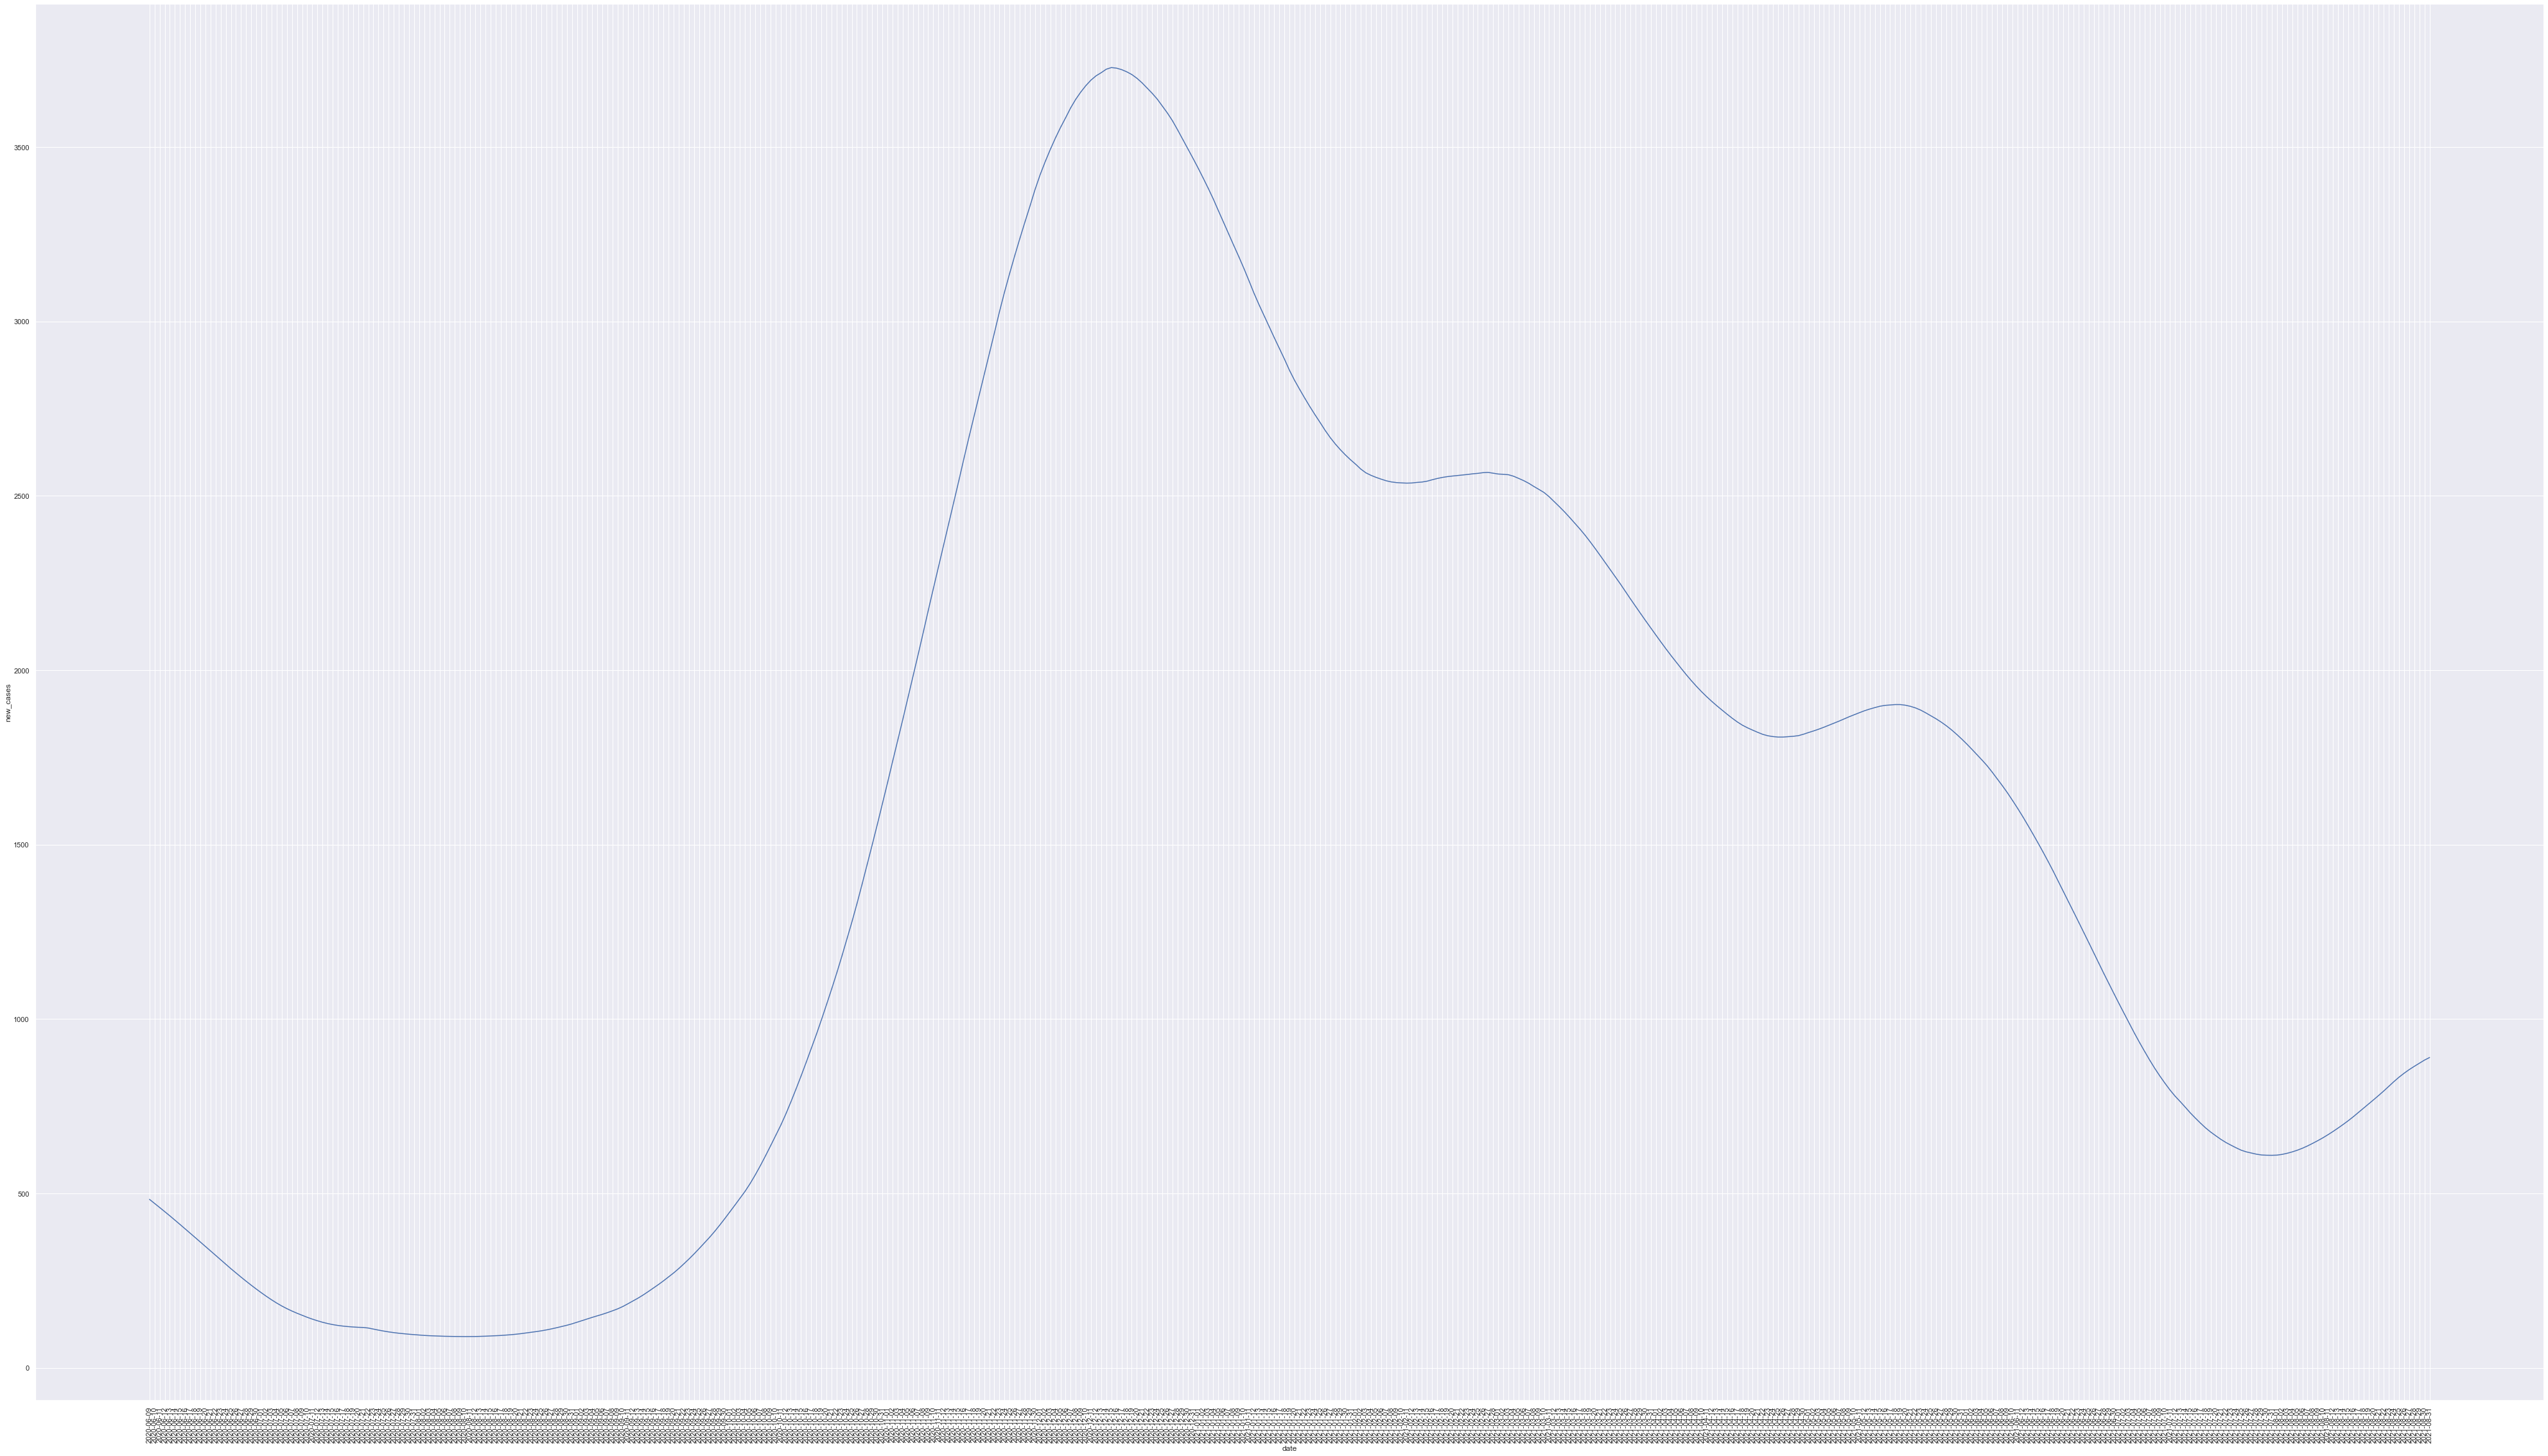

In [267]:
#Andorra new_cases_100MA plotting
andorra_new_cases_100MA = pd.concat([date, andorra_new_cases.rolling(100, win_type='triang').sum()], axis=1)
andorra_new_cases_100MA
sns.set(rc={'figure.figsize':(70,40)})
sns.lineplot(x="date",y="new_cases",data=andorra_new_cases_100MA)
plt.xticks(rotation=90)
plt.show()

#Andorra peaked at 2020-10-15 --> Anything interesting happened around that date?

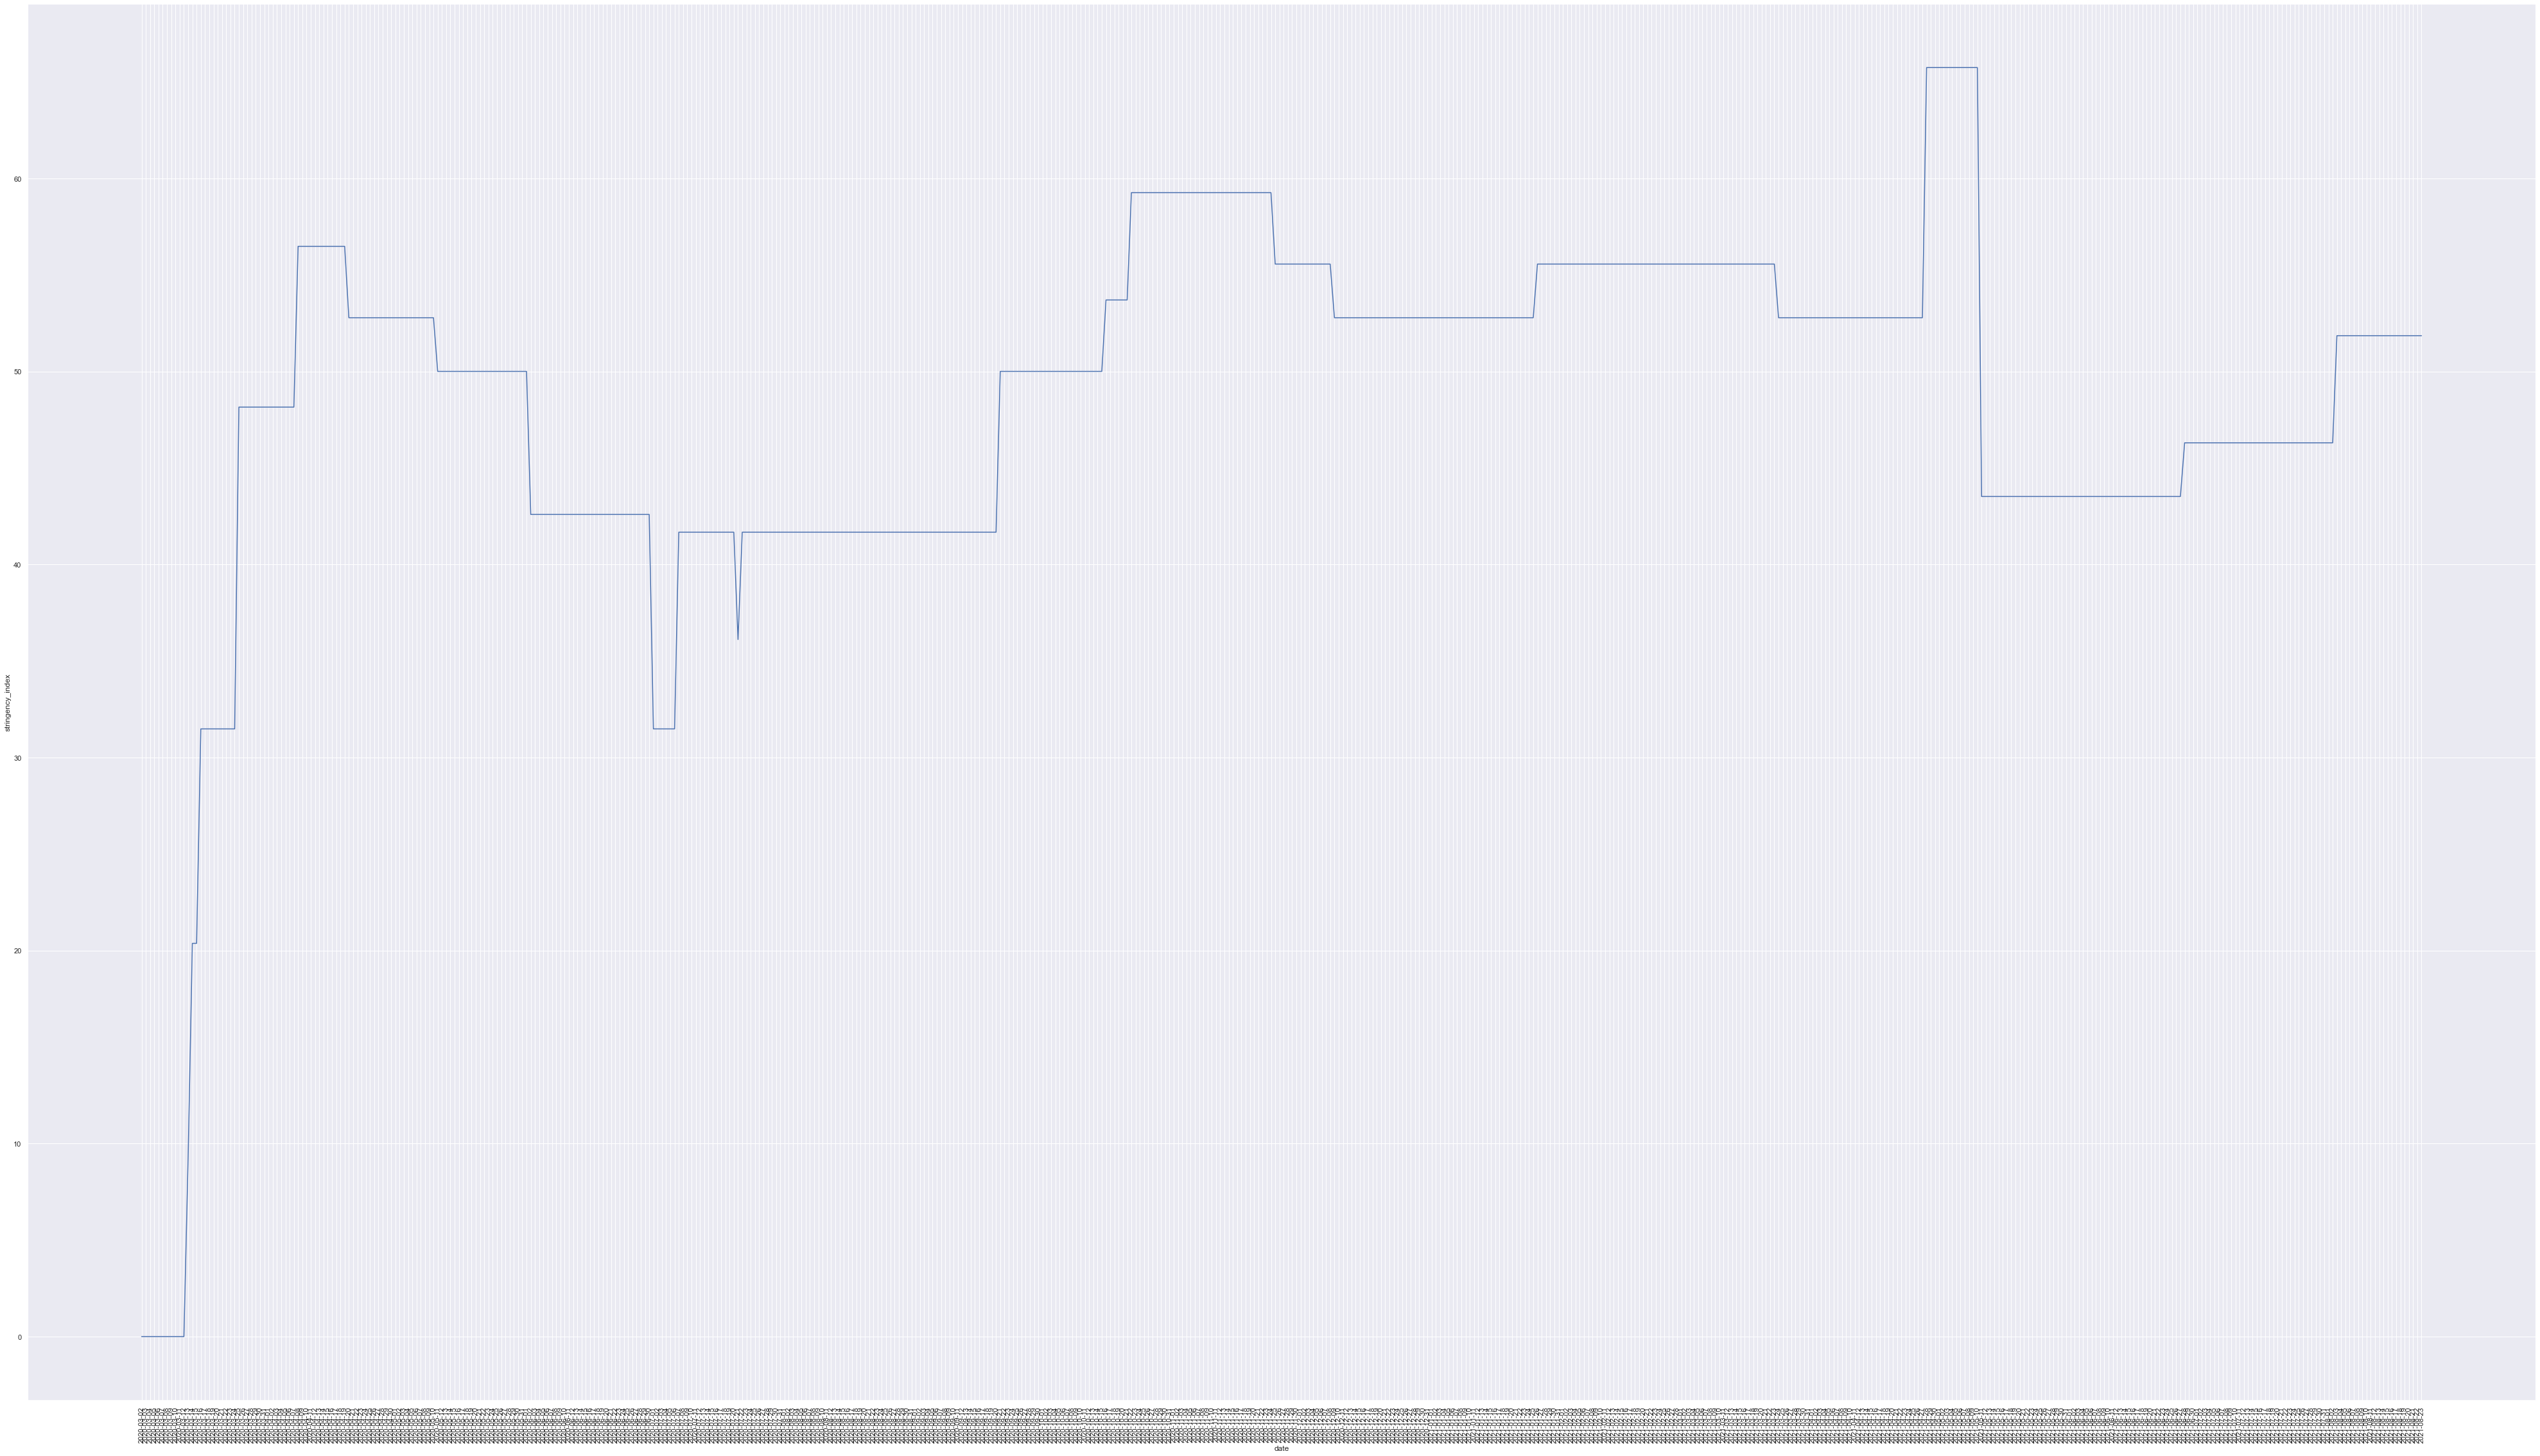

In [264]:
#Andorra stringency index plotting
policy_andorra = policy[policy['location']=="Andorra"]
sns.set(rc={'figure.figsize':(70,40)})
sns.lineplot(x="date",y="stringency_index",data=policy_andorra)
plt.xticks(rotation=90)
plt.show()

In [287]:
#Correlation between median age of a country and its covid new_cases?
#Maybe younger the median age, less likely to get covid for that country
median_age = pd.concat([id, others['median_age'].to_frame()], axis=1)
median_age_andorra = median_age[median_age["location"] == "Andorra"]
median_age_andorra
#Null values --> Let's try Argentina

,iso_code,continent,location,date,median_age
2229,AND,Europe,Andorra,2020-03-02,NaN
2230,AND,Europe,Andorra,2020-03-03,NaN
2231,AND,Europe,Andorra,2020-03-04,NaN
2232,AND,Europe,Andorra,2020-03-05,NaN
2233,AND,Europe,Andorra,2020-03-06,NaN
...,...,...,...,...,...
2772,AND,Europe,Andorra,2021-08-27,NaN
2773,AND,Europe,Andorra,2021-08-28,NaN
2774,AND,Europe,Andorra,2021-08-29,NaN
2775,AND,Europe,Andorra,2021-08-30,NaN


# Anguilla

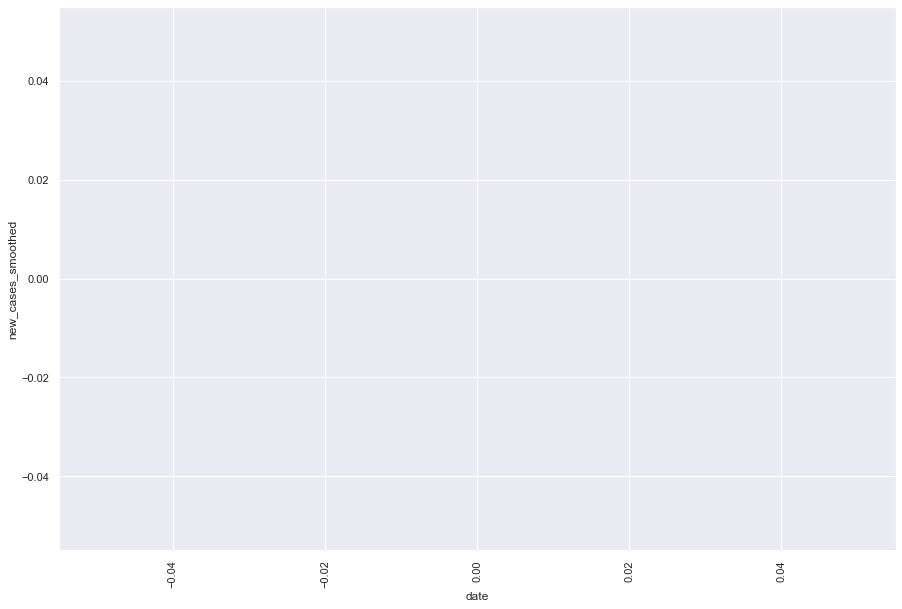

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
3307,AIA,North America,Anguilla,2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3308,AIA,North America,Anguilla,2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3309,AIA,North America,Anguilla,2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3310,AIA,North America,Anguilla,2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3311,AIA,North America,Anguilla,2021-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,AIA,North America,Anguilla,2021-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3501,AIA,North America,Anguilla,2021-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3502,AIA,North America,Anguilla,2021-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3503,AIA,North America,Anguilla,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
#Lets plot new_cases_smooth for Anguilla
cases_anguilla = cases[cases['location']=="Anguilla"]
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="new_cases_smoothed",data=cases_anguilla)
plt.xticks(rotation=90)
plt.show()
cases_anguilla

# Argentina

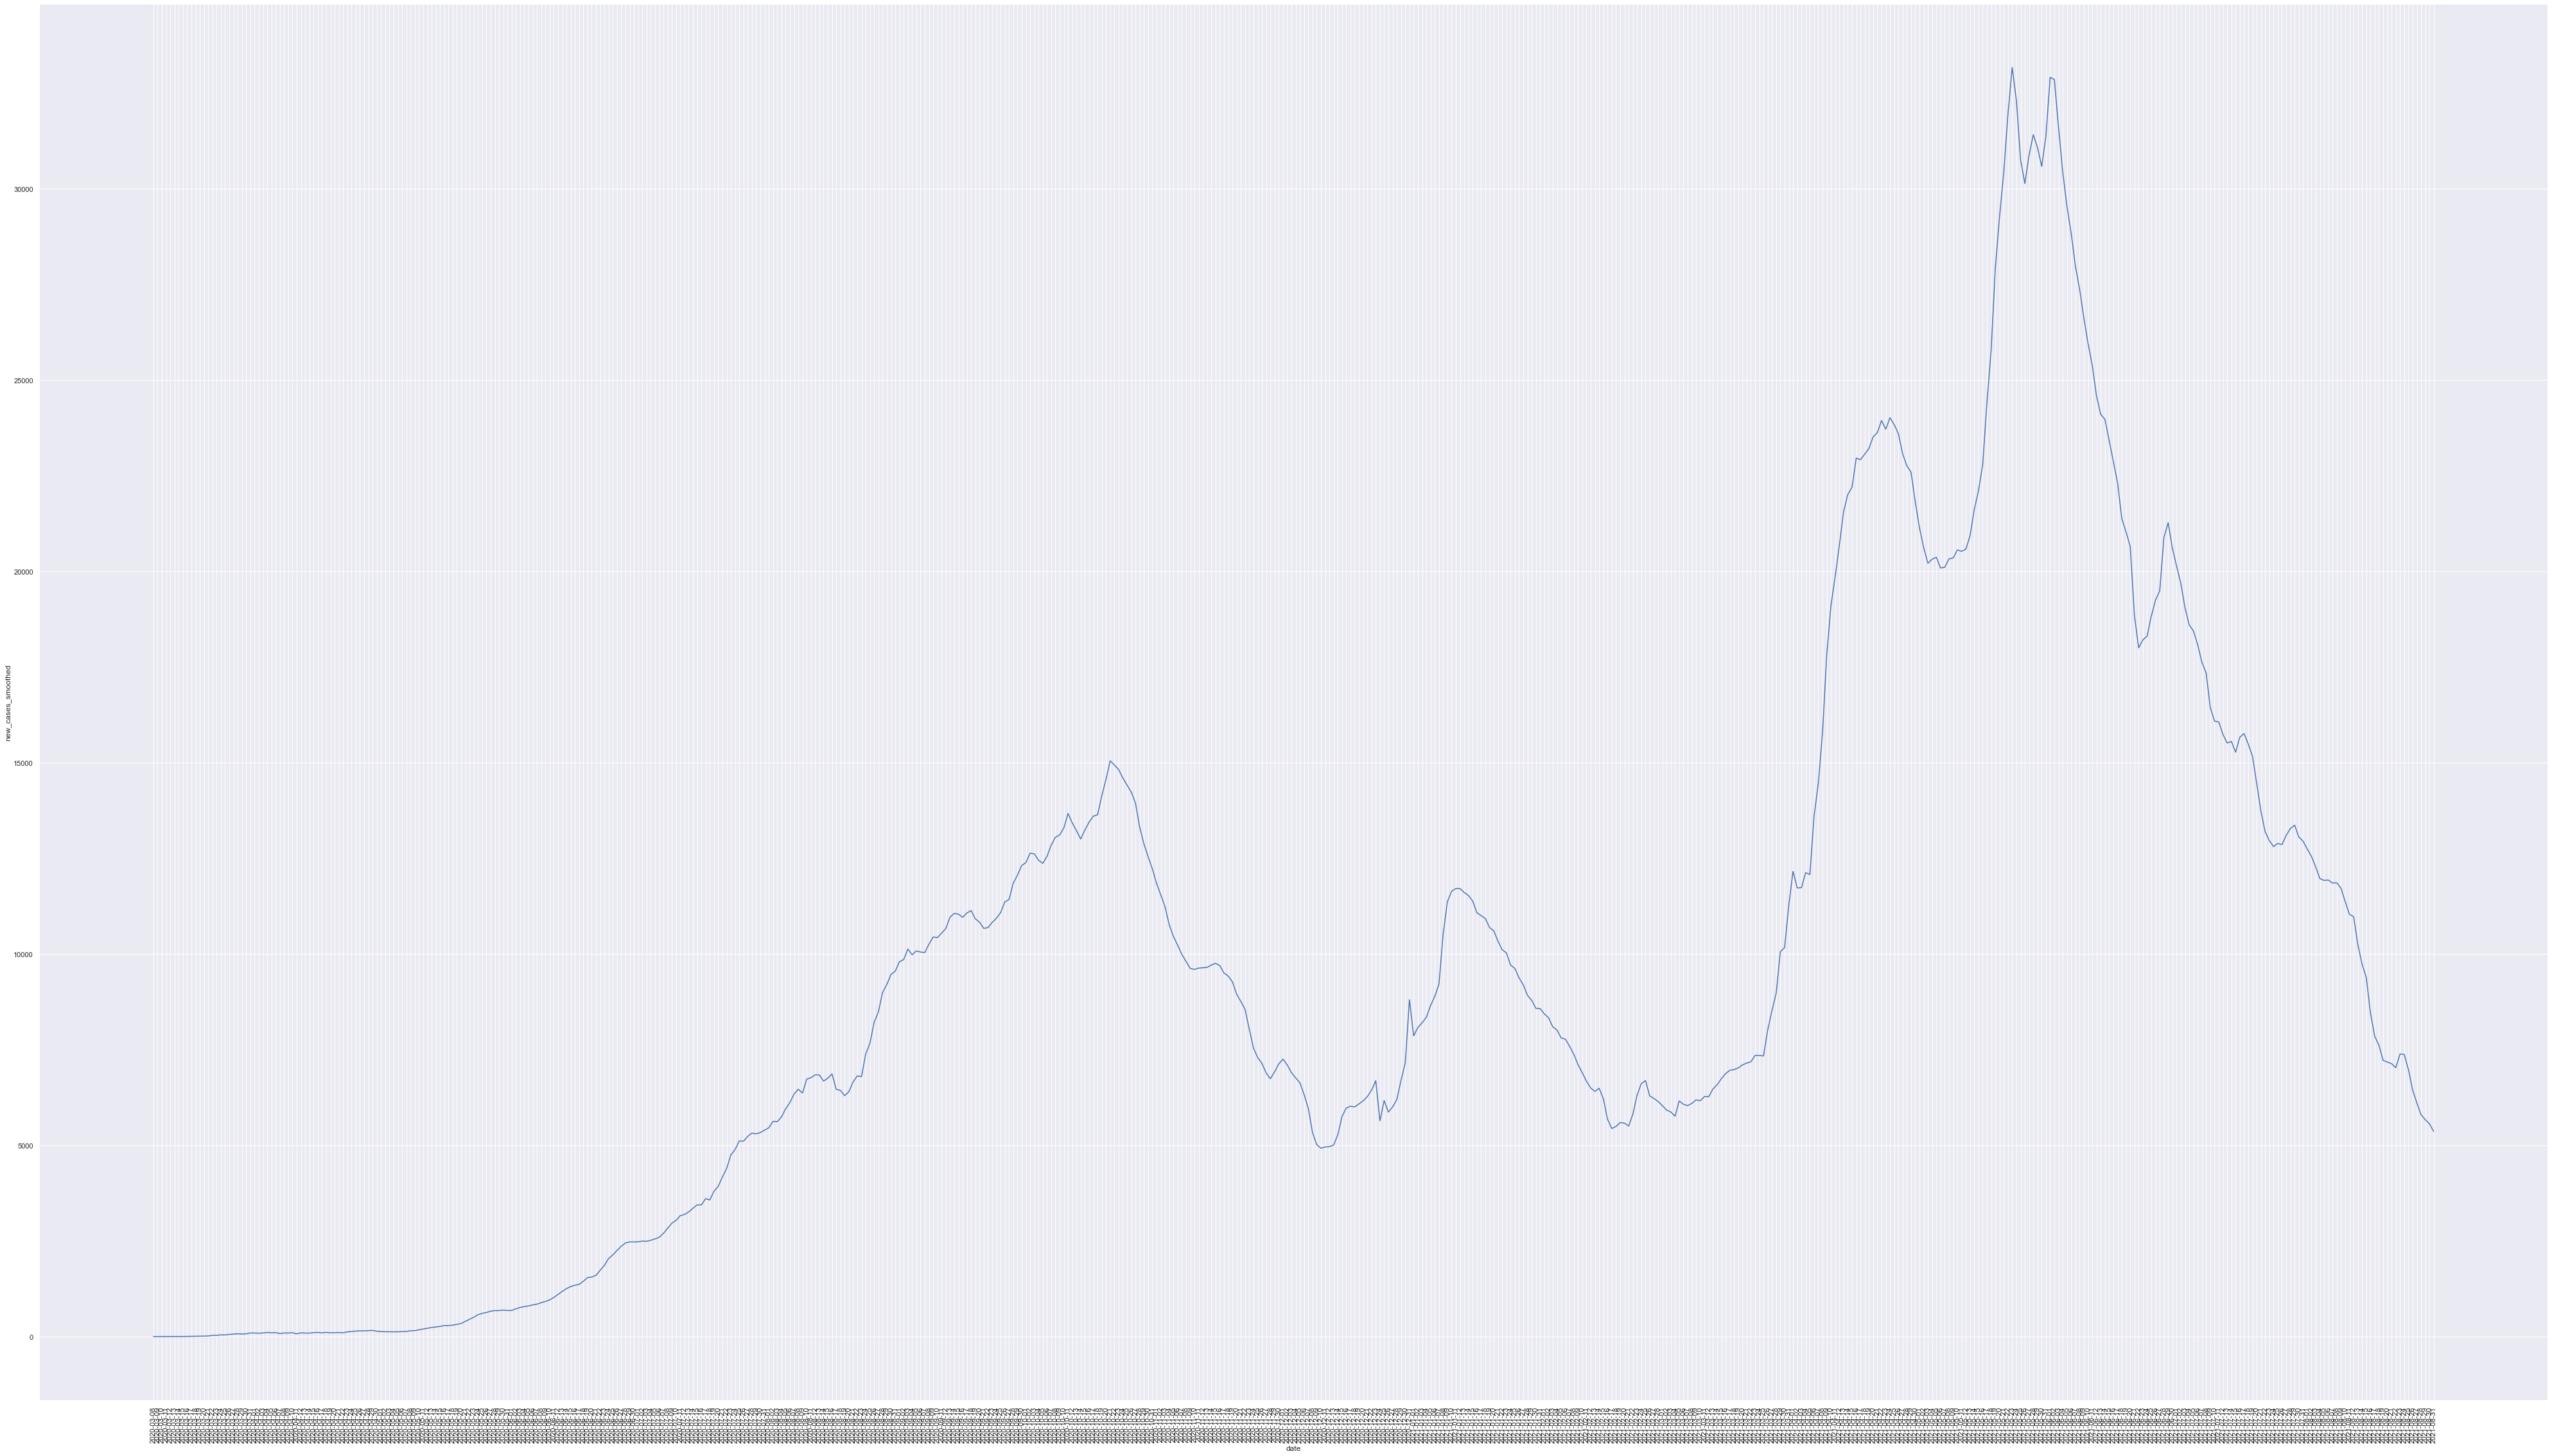

In [251]:
#Lets plot new_cases_smooth for Argentina (7MA)
cases_argentina = cases[cases['location']=="Argentina"]
sns.set(rc={'figure.figsize':(70,40)})
sns.lineplot(x="date",y="new_cases_smoothed",data=cases_argentina)
plt.xticks(rotation=90)
plt.show()

#Argentina peaked at 2021-05-27

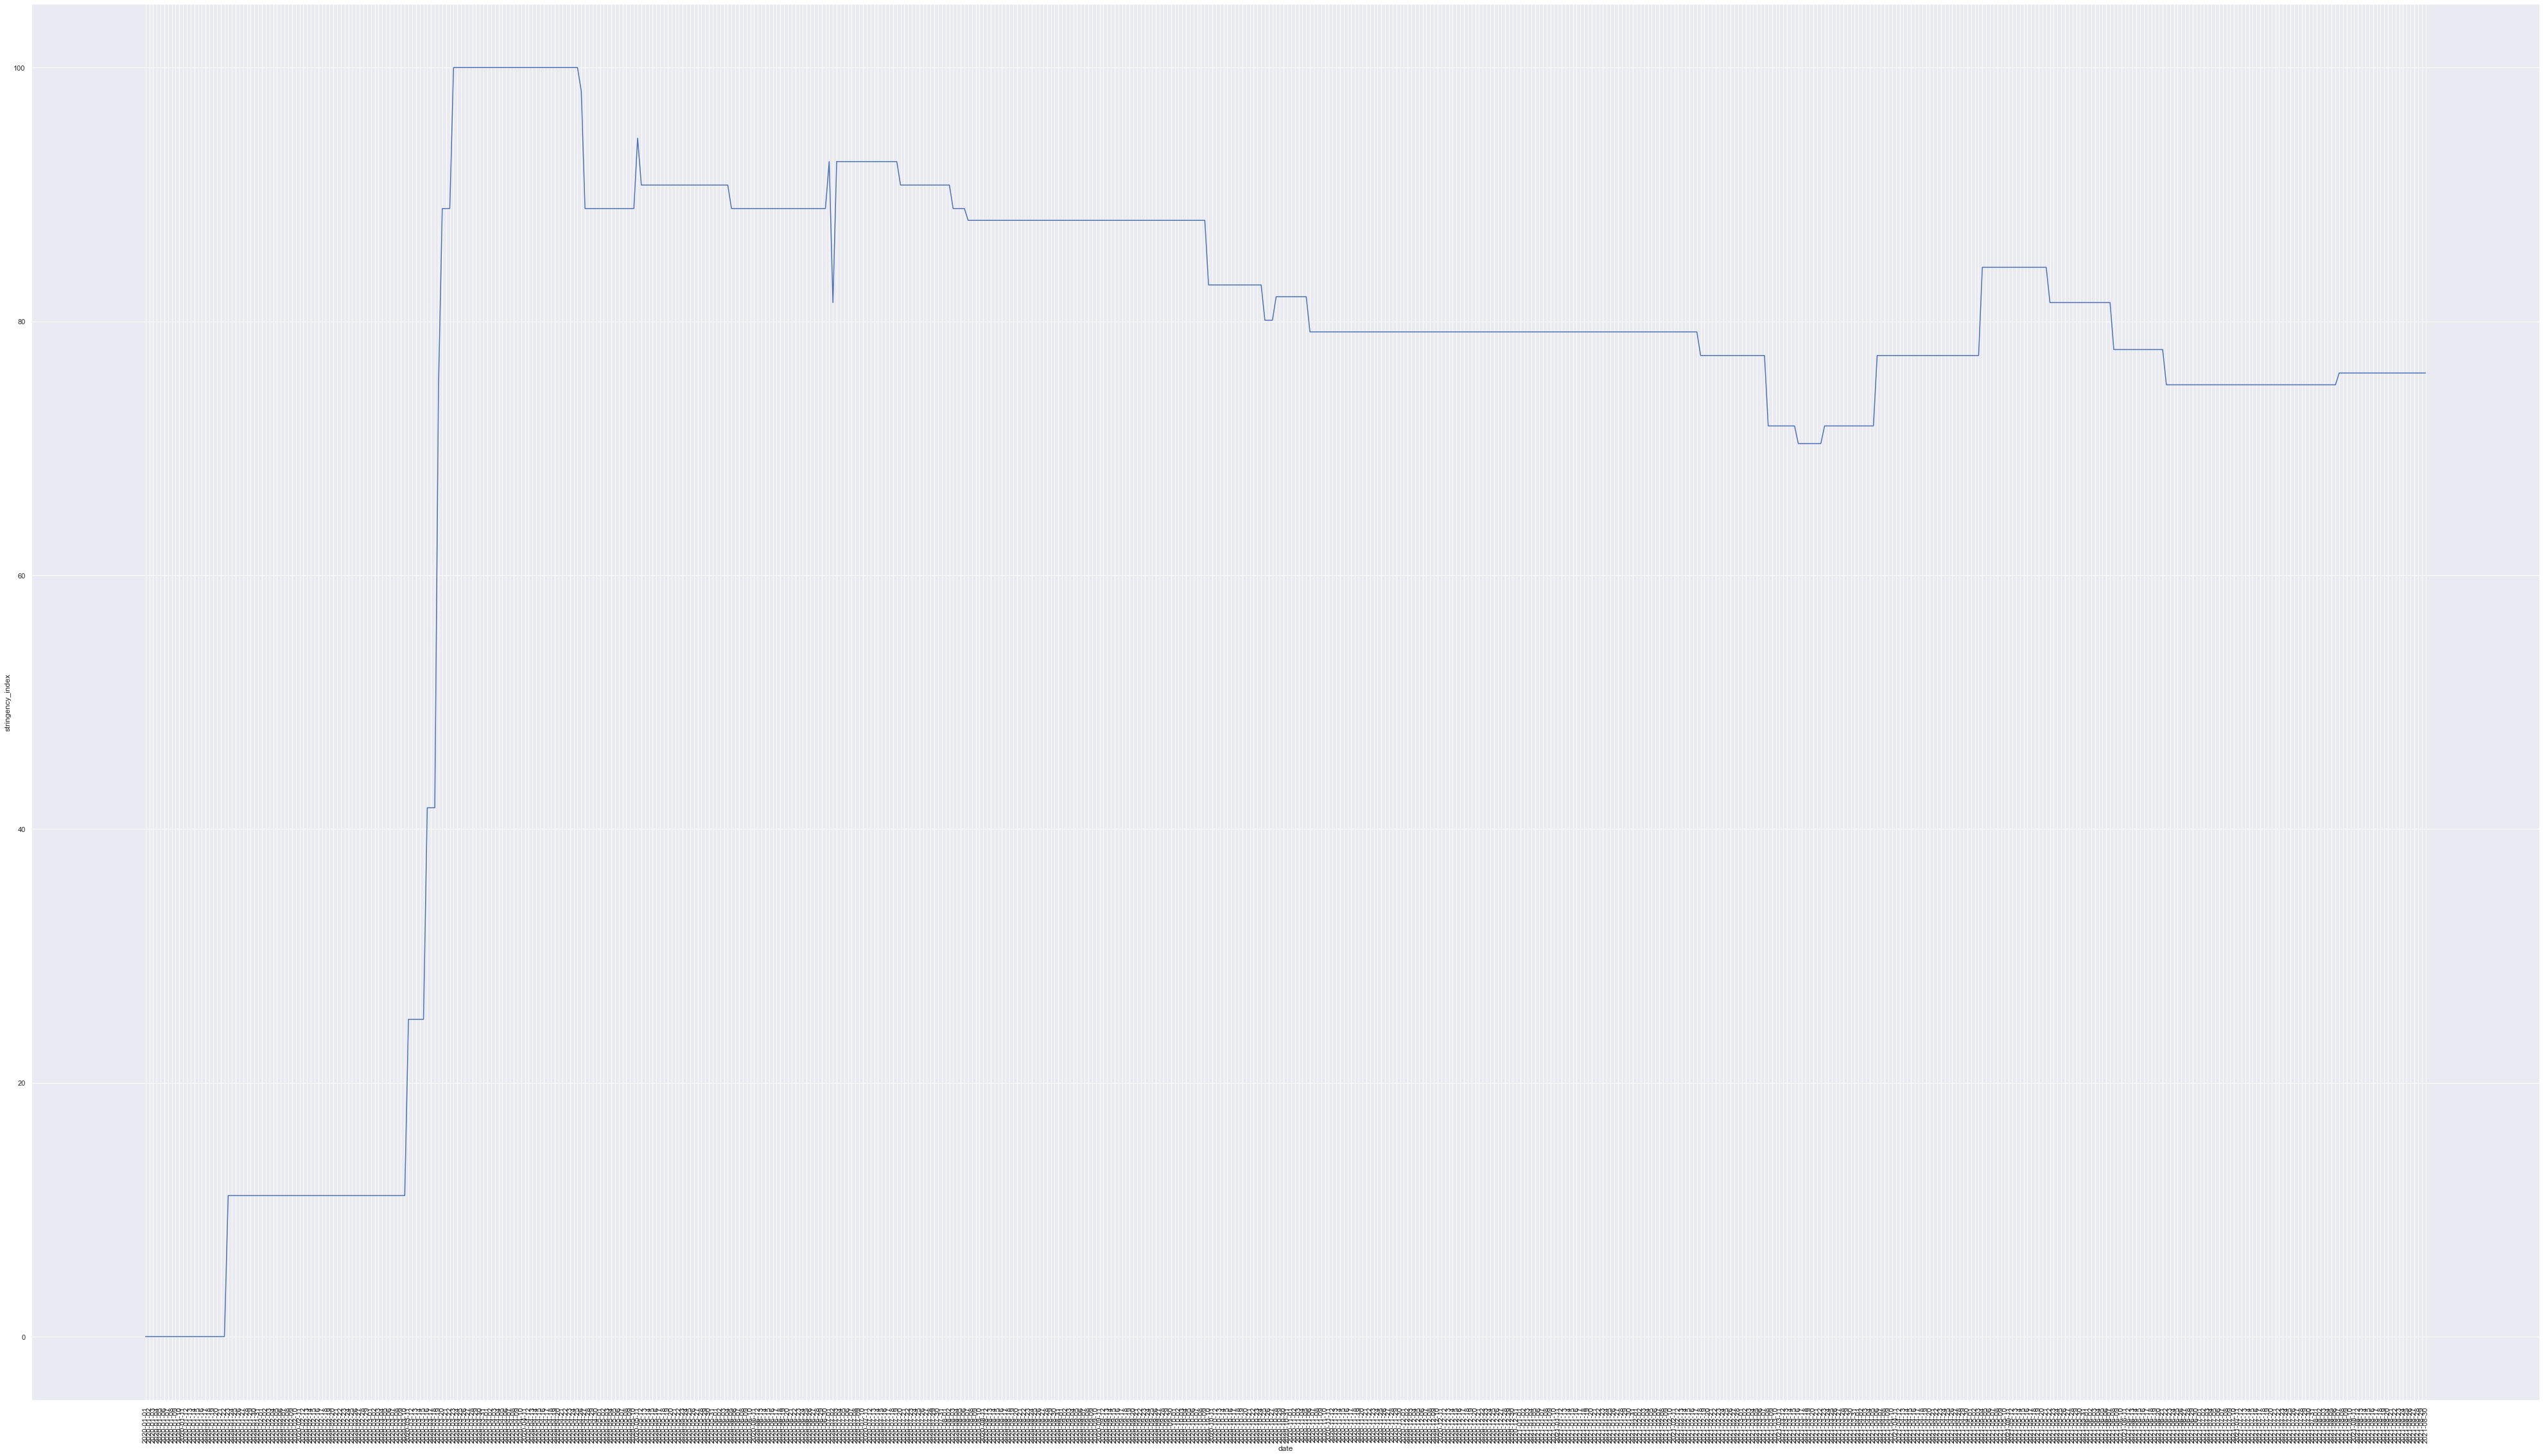

In [268]:
policy_argentina = policy[policy['location']=="Argentina"]
sns.set(rc={'figure.figsize':(70,40)})
sns.lineplot(x="date",y="stringency_index",data=policy_argentina)
plt.xticks(rotation=90)
plt.show()

In [293]:
median_age_argentina = median_age[median_age["location"] == "Argentina"]
median_age_argentina['median_age'].drop_duplicates()  #median age in Argentina

4042    31.9
Name: median_age, dtype: float64

# South Africa

In [297]:
#check if South Africa has 50+ vaccination rate
(each_country_people_vaccinated_per_hundred["location"] == "South Africa").values.any()

True

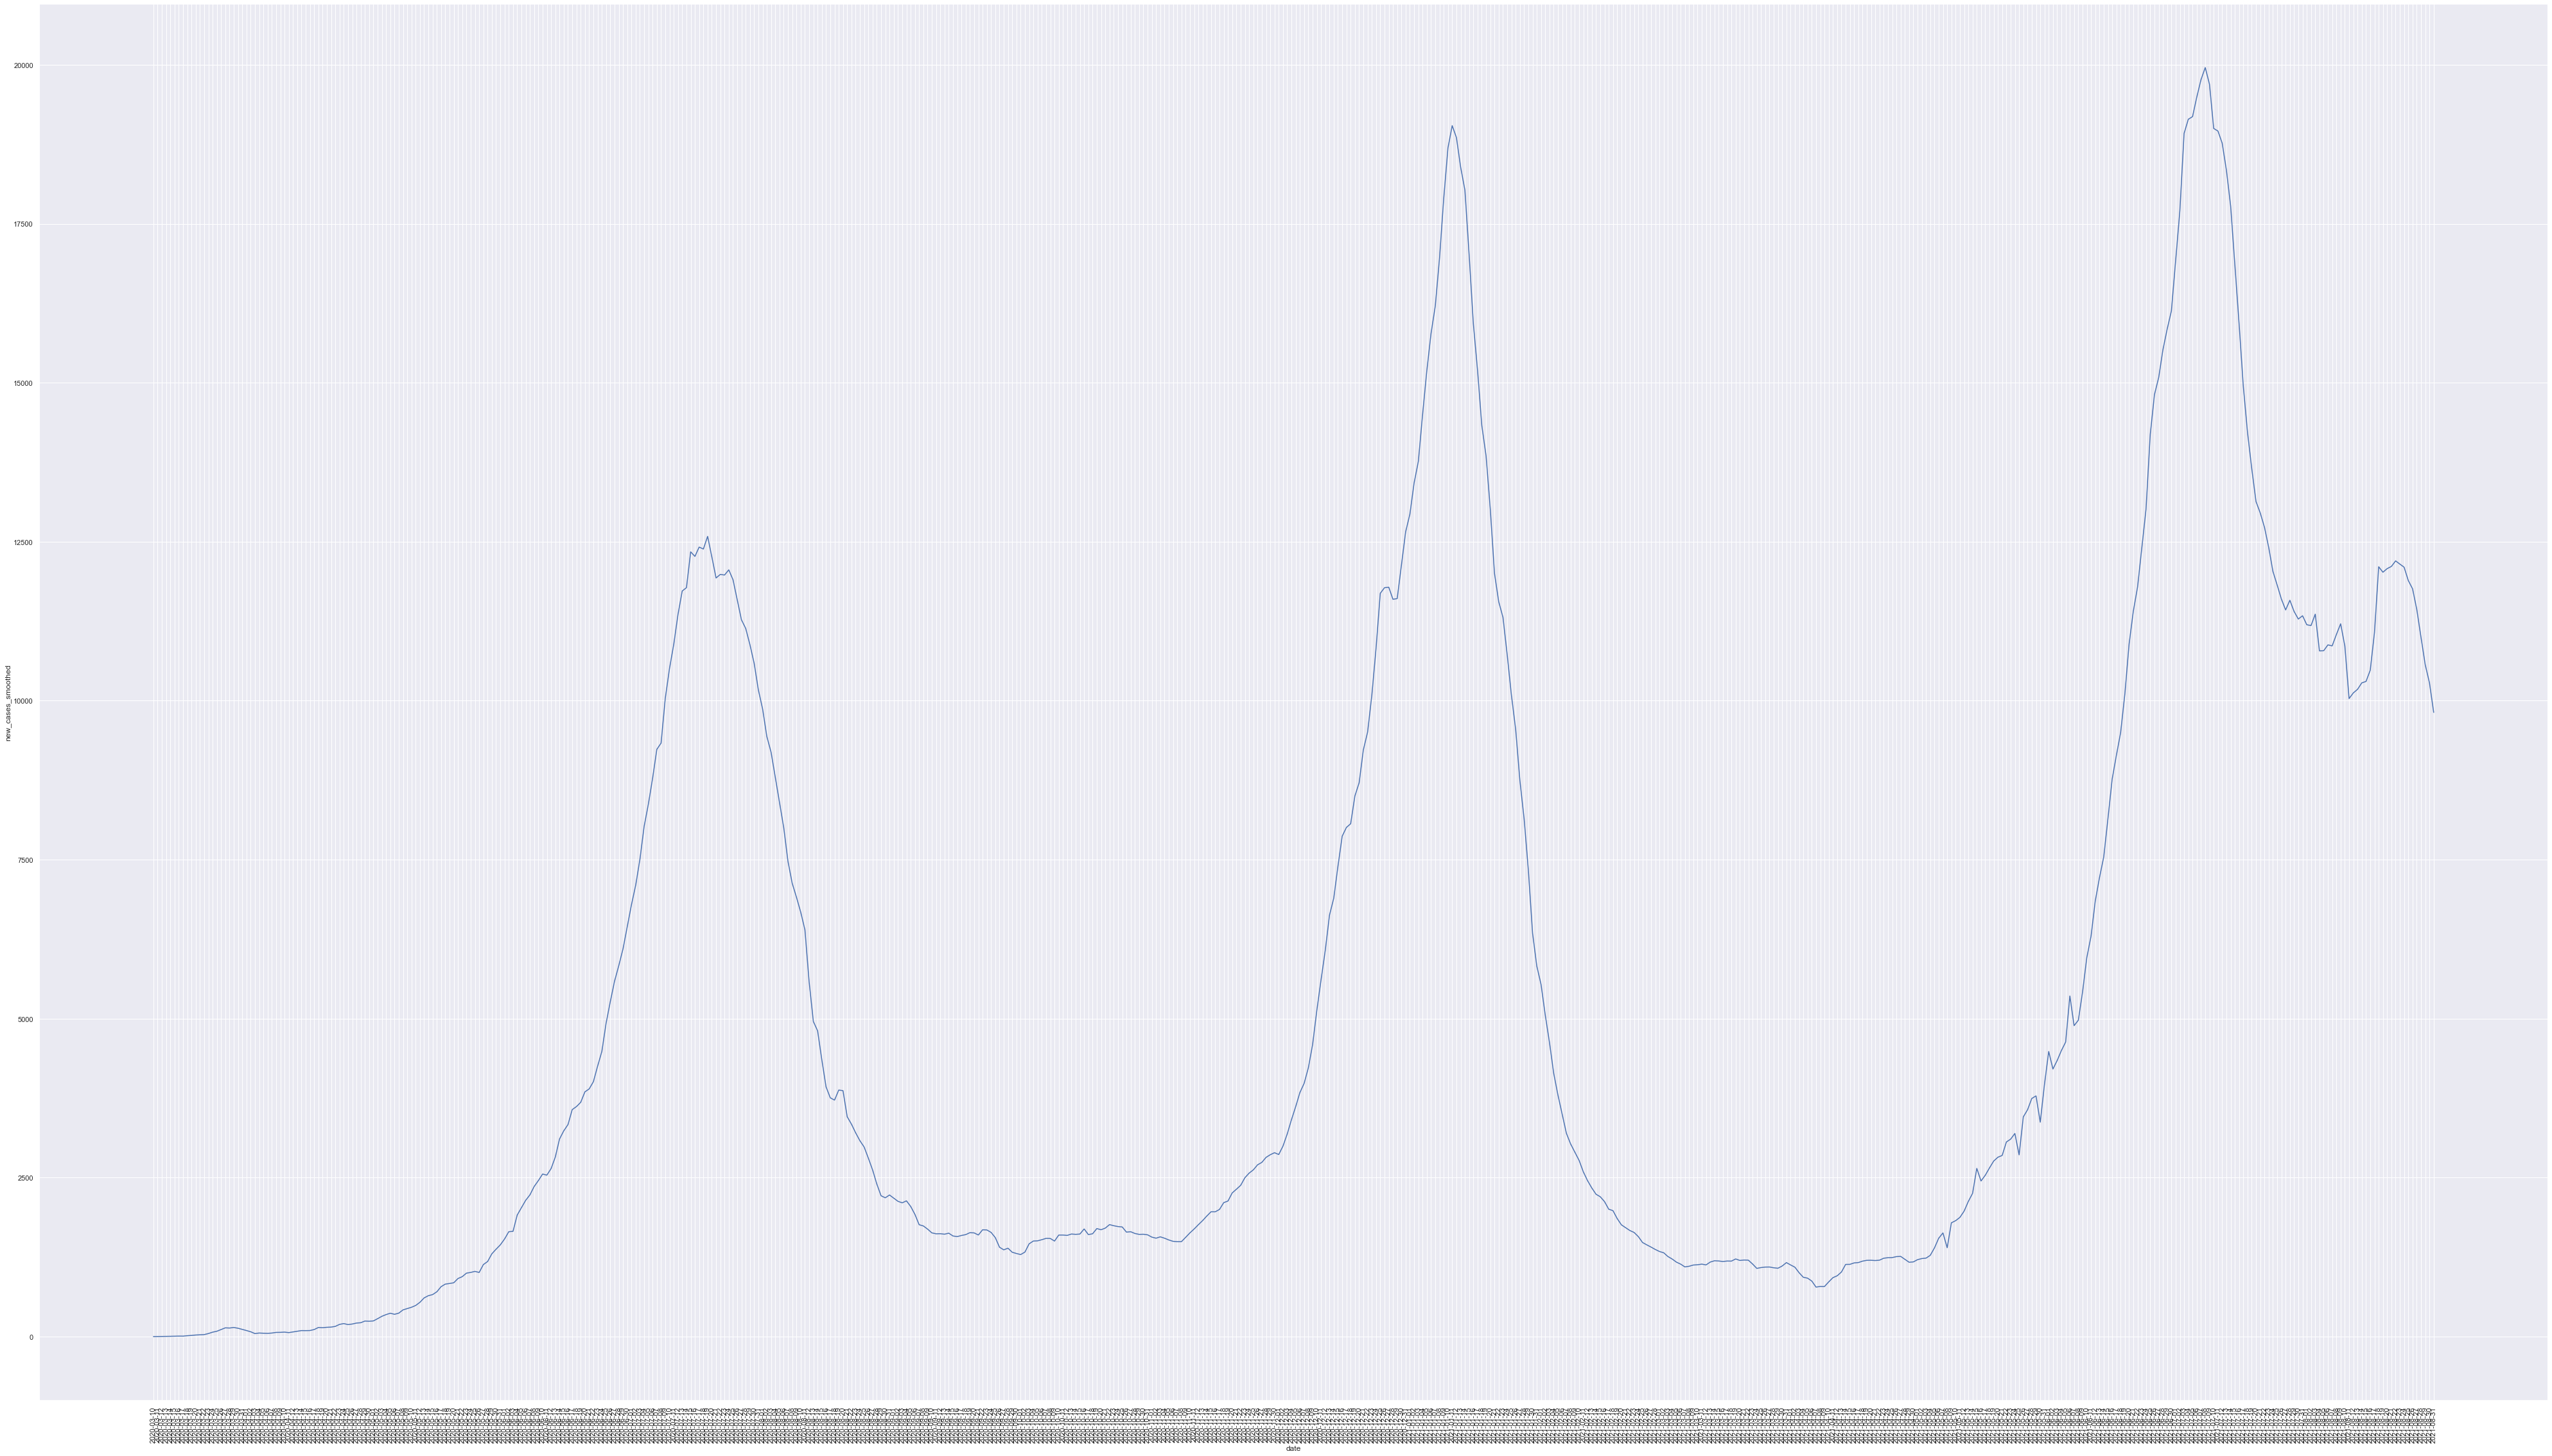

In [298]:
#Lets plot new_cases_smooth for South Africa (7MA)
cases_south_africa = cases[cases['location']=="South Africa"]
sns.set(rc={'figure.figsize':(70,40)})
sns.lineplot(x="date",y="new_cases_smoothed",data=cases_south_africa)
plt.xticks(rotation=90)
plt.show()

#South Africa peaked at 2020-07-19, 2021-01-12 2021-07-18

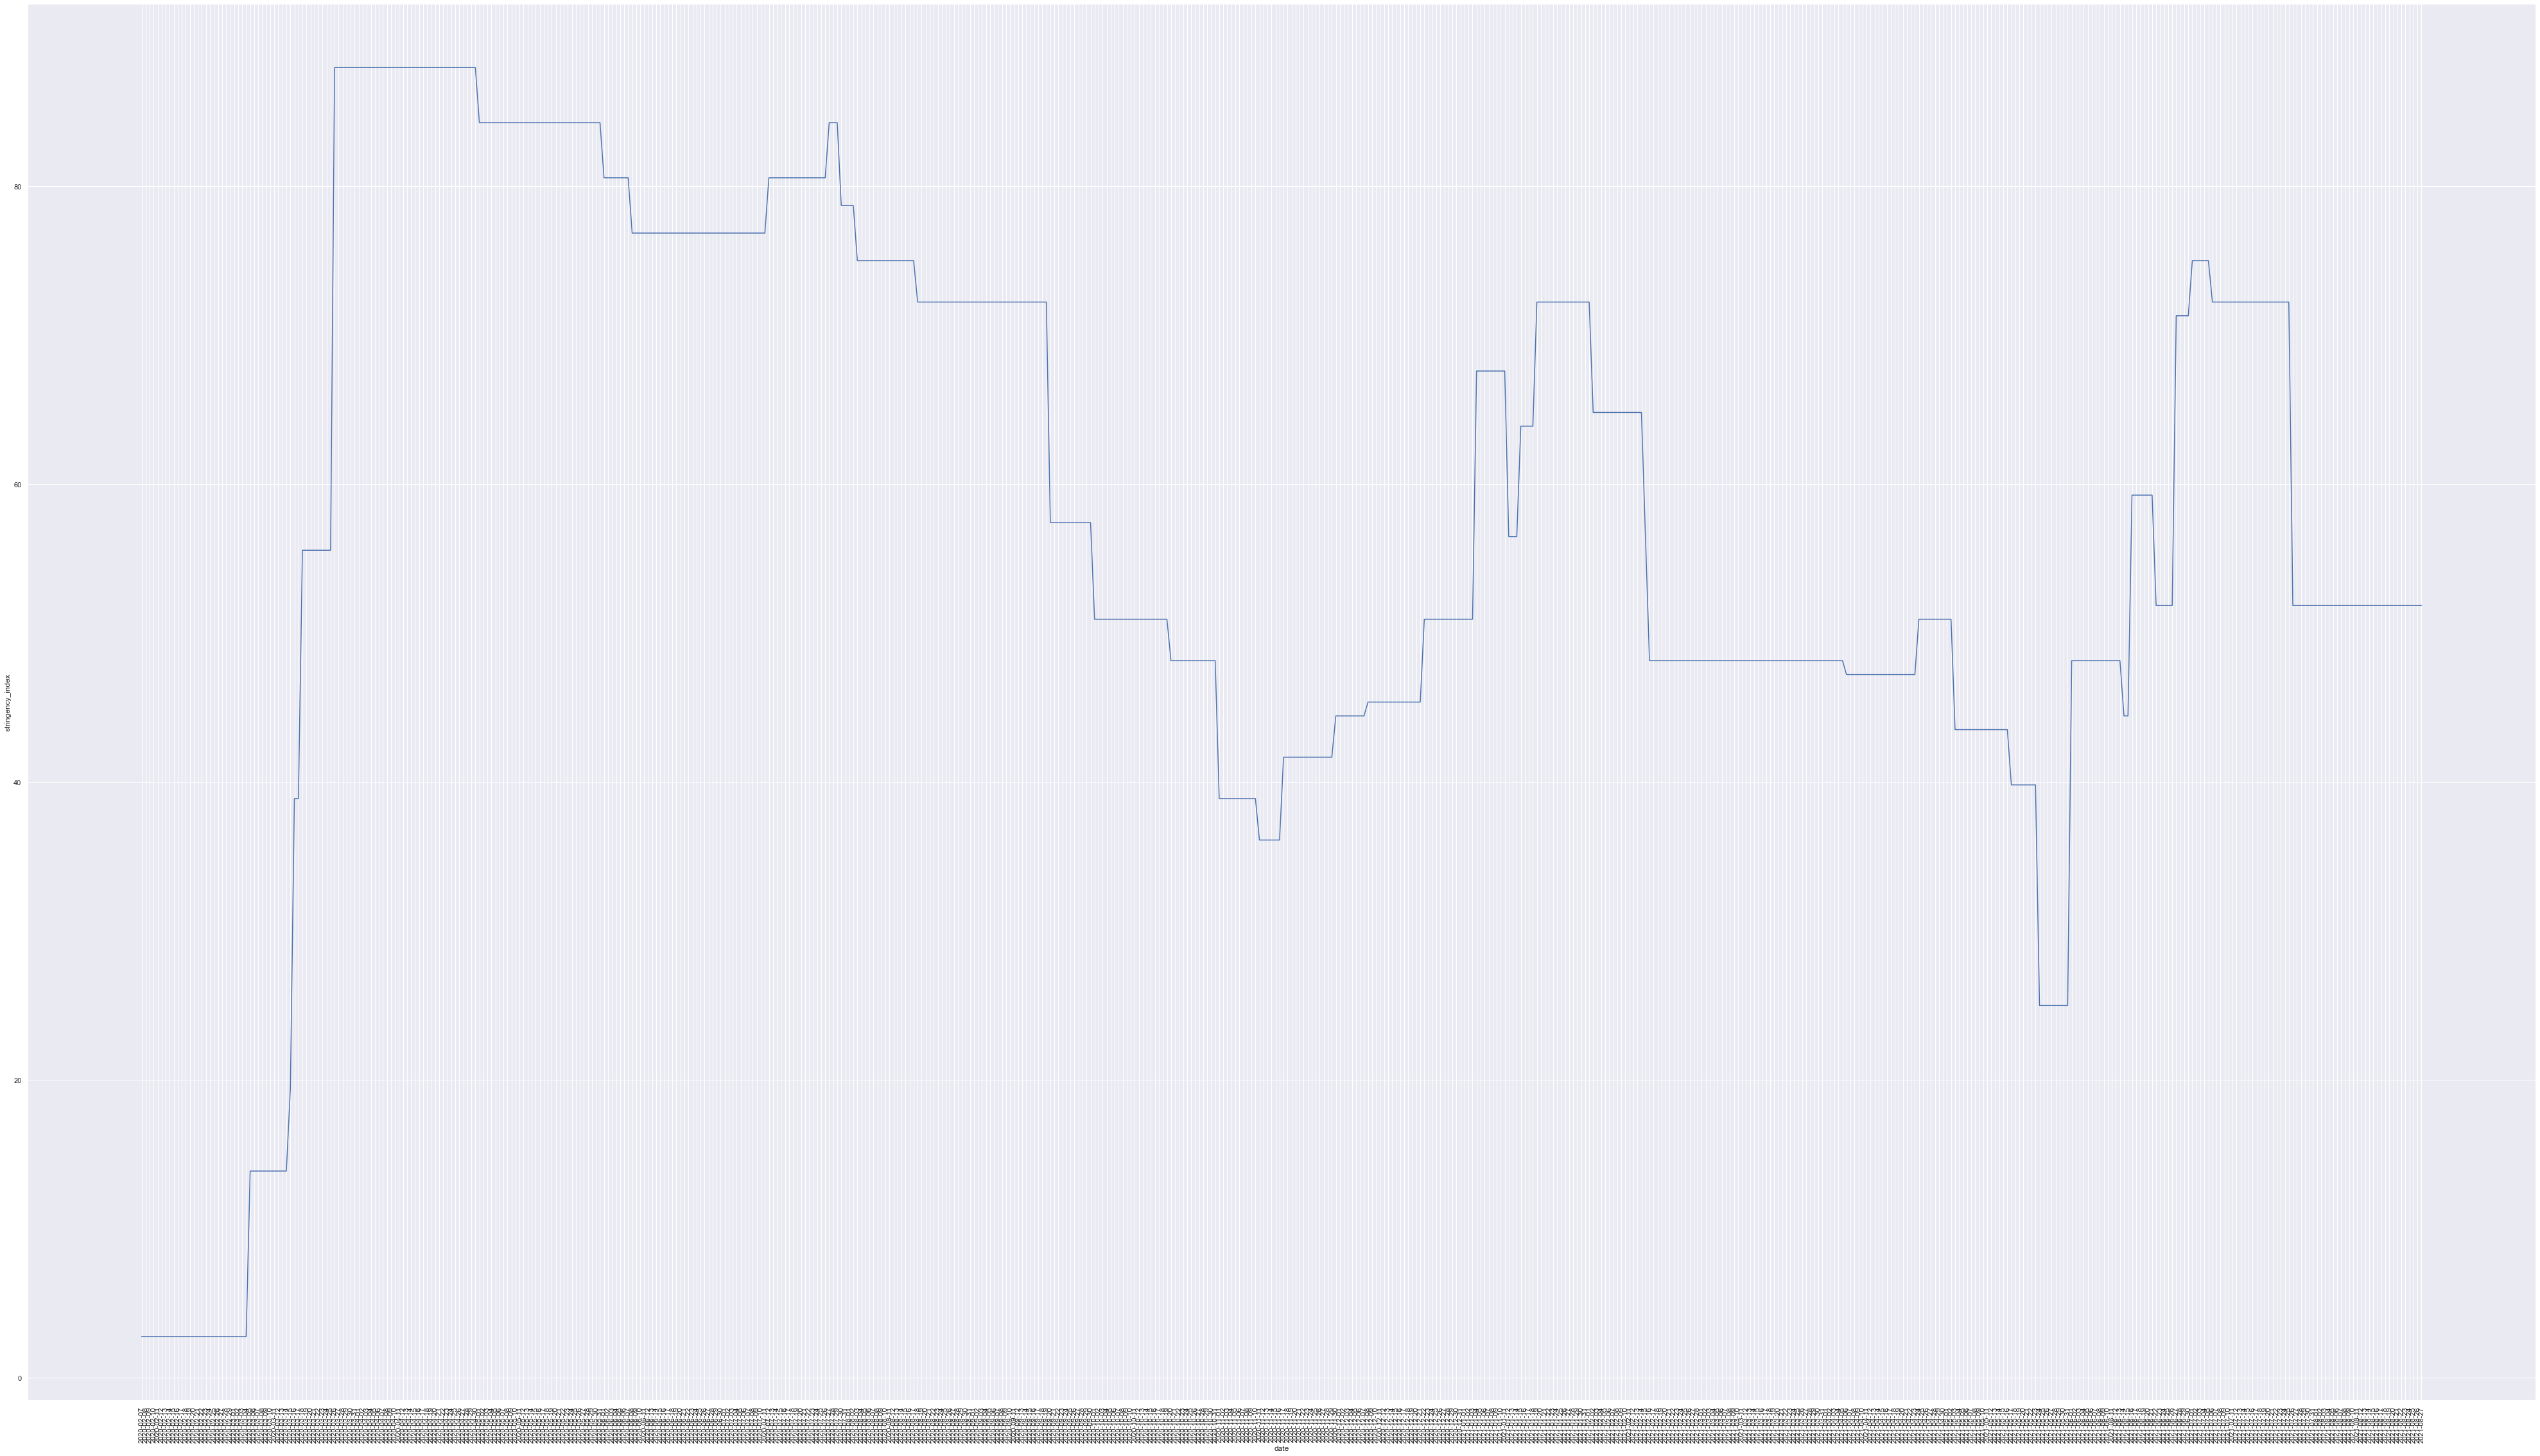

In [300]:
policy_south_africa = policy[policy['location']=="South Africa"]
sns.set(rc={'figure.figsize':(70,40)})
sns.lineplot(x="date",y="stringency_index",data=policy_south_africa)
plt.xticks(rotation=90)
plt.show()

In [299]:
median_age_south_africa = median_age[median_age["location"] == "South Africa"]
median_age_south_africa['median_age'].drop_duplicates()  #median age in South Africa

93647    27.3
Name: median_age, dtype: float64

# US

In [337]:
#when did the US vaccination pass 50%?
us_people_vaccinated_per_hundred=people_vaccinated_per_hundred[people_vaccinated_per_hundred["location"]=="United States"]
us_people_vaccinated_per_hundred[us_people_vaccinated_per_hundred["people_vaccinated_per_hundred"]>49.8]
#US vaccination rate surpassed 50% as of 2021-05-30

,iso_code,continent,location,date,people_vaccinated_per_hundred
107872,USA,North America,United States,2021-05-30,49.87
107874,USA,North America,United States,2021-06-01,50.10
107875,USA,North America,United States,2021-06-02,50.17
107876,USA,North America,United States,2021-06-03,50.28
107877,USA,North America,United States,2021-06-04,50.47
...,...,...,...,...,...
107960,USA,North America,United States,2021-08-26,60.35
107961,USA,North America,United States,2021-08-27,60.50
107962,USA,North America,United States,2021-08-28,60.65
107963,USA,North America,United States,2021-08-29,60.79


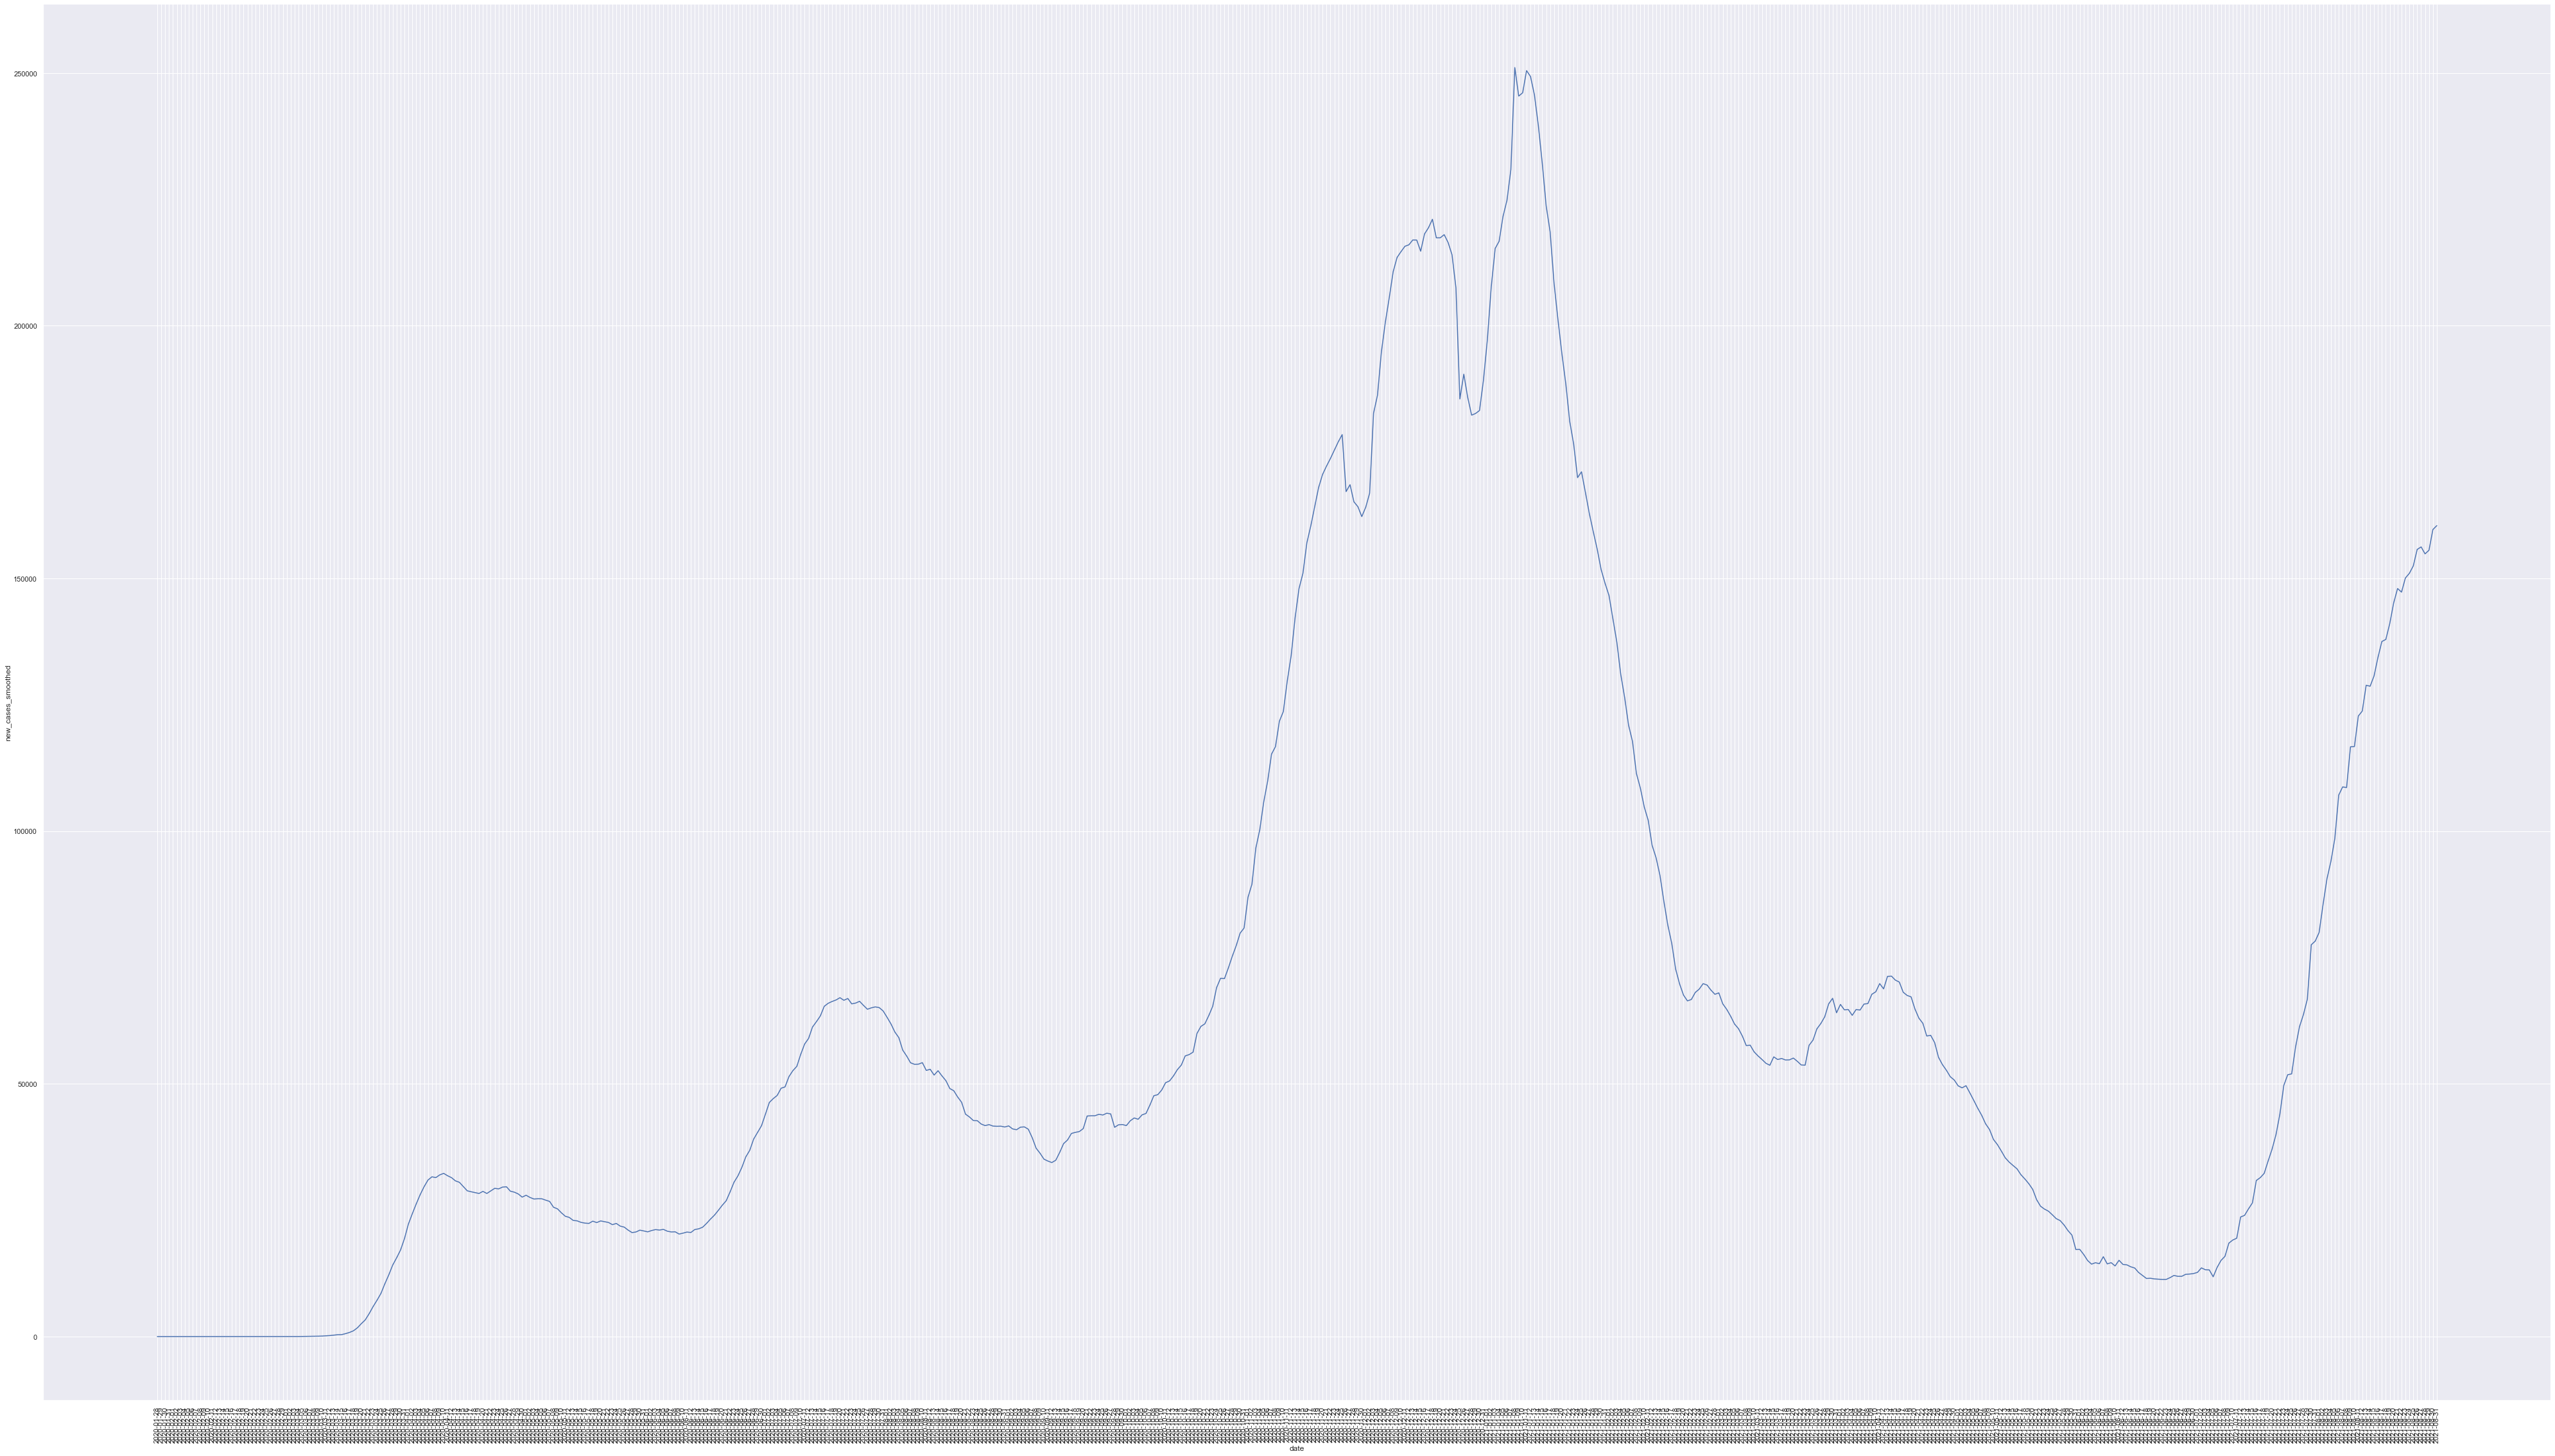

In [333]:
#Lets plot new_cases_smooth for the United States(7MA)
US_new_cases = cases[cases['location']=="United States"]
sns.set(rc={'figure.figsize':(70,40)})
sns.lineplot(x="date",y="new_cases_smoothed",data=US_new_cases)
plt.xticks(rotation=90)
plt.show()
#US peaked at 2021-01-12
#US new_cases still skyrockets

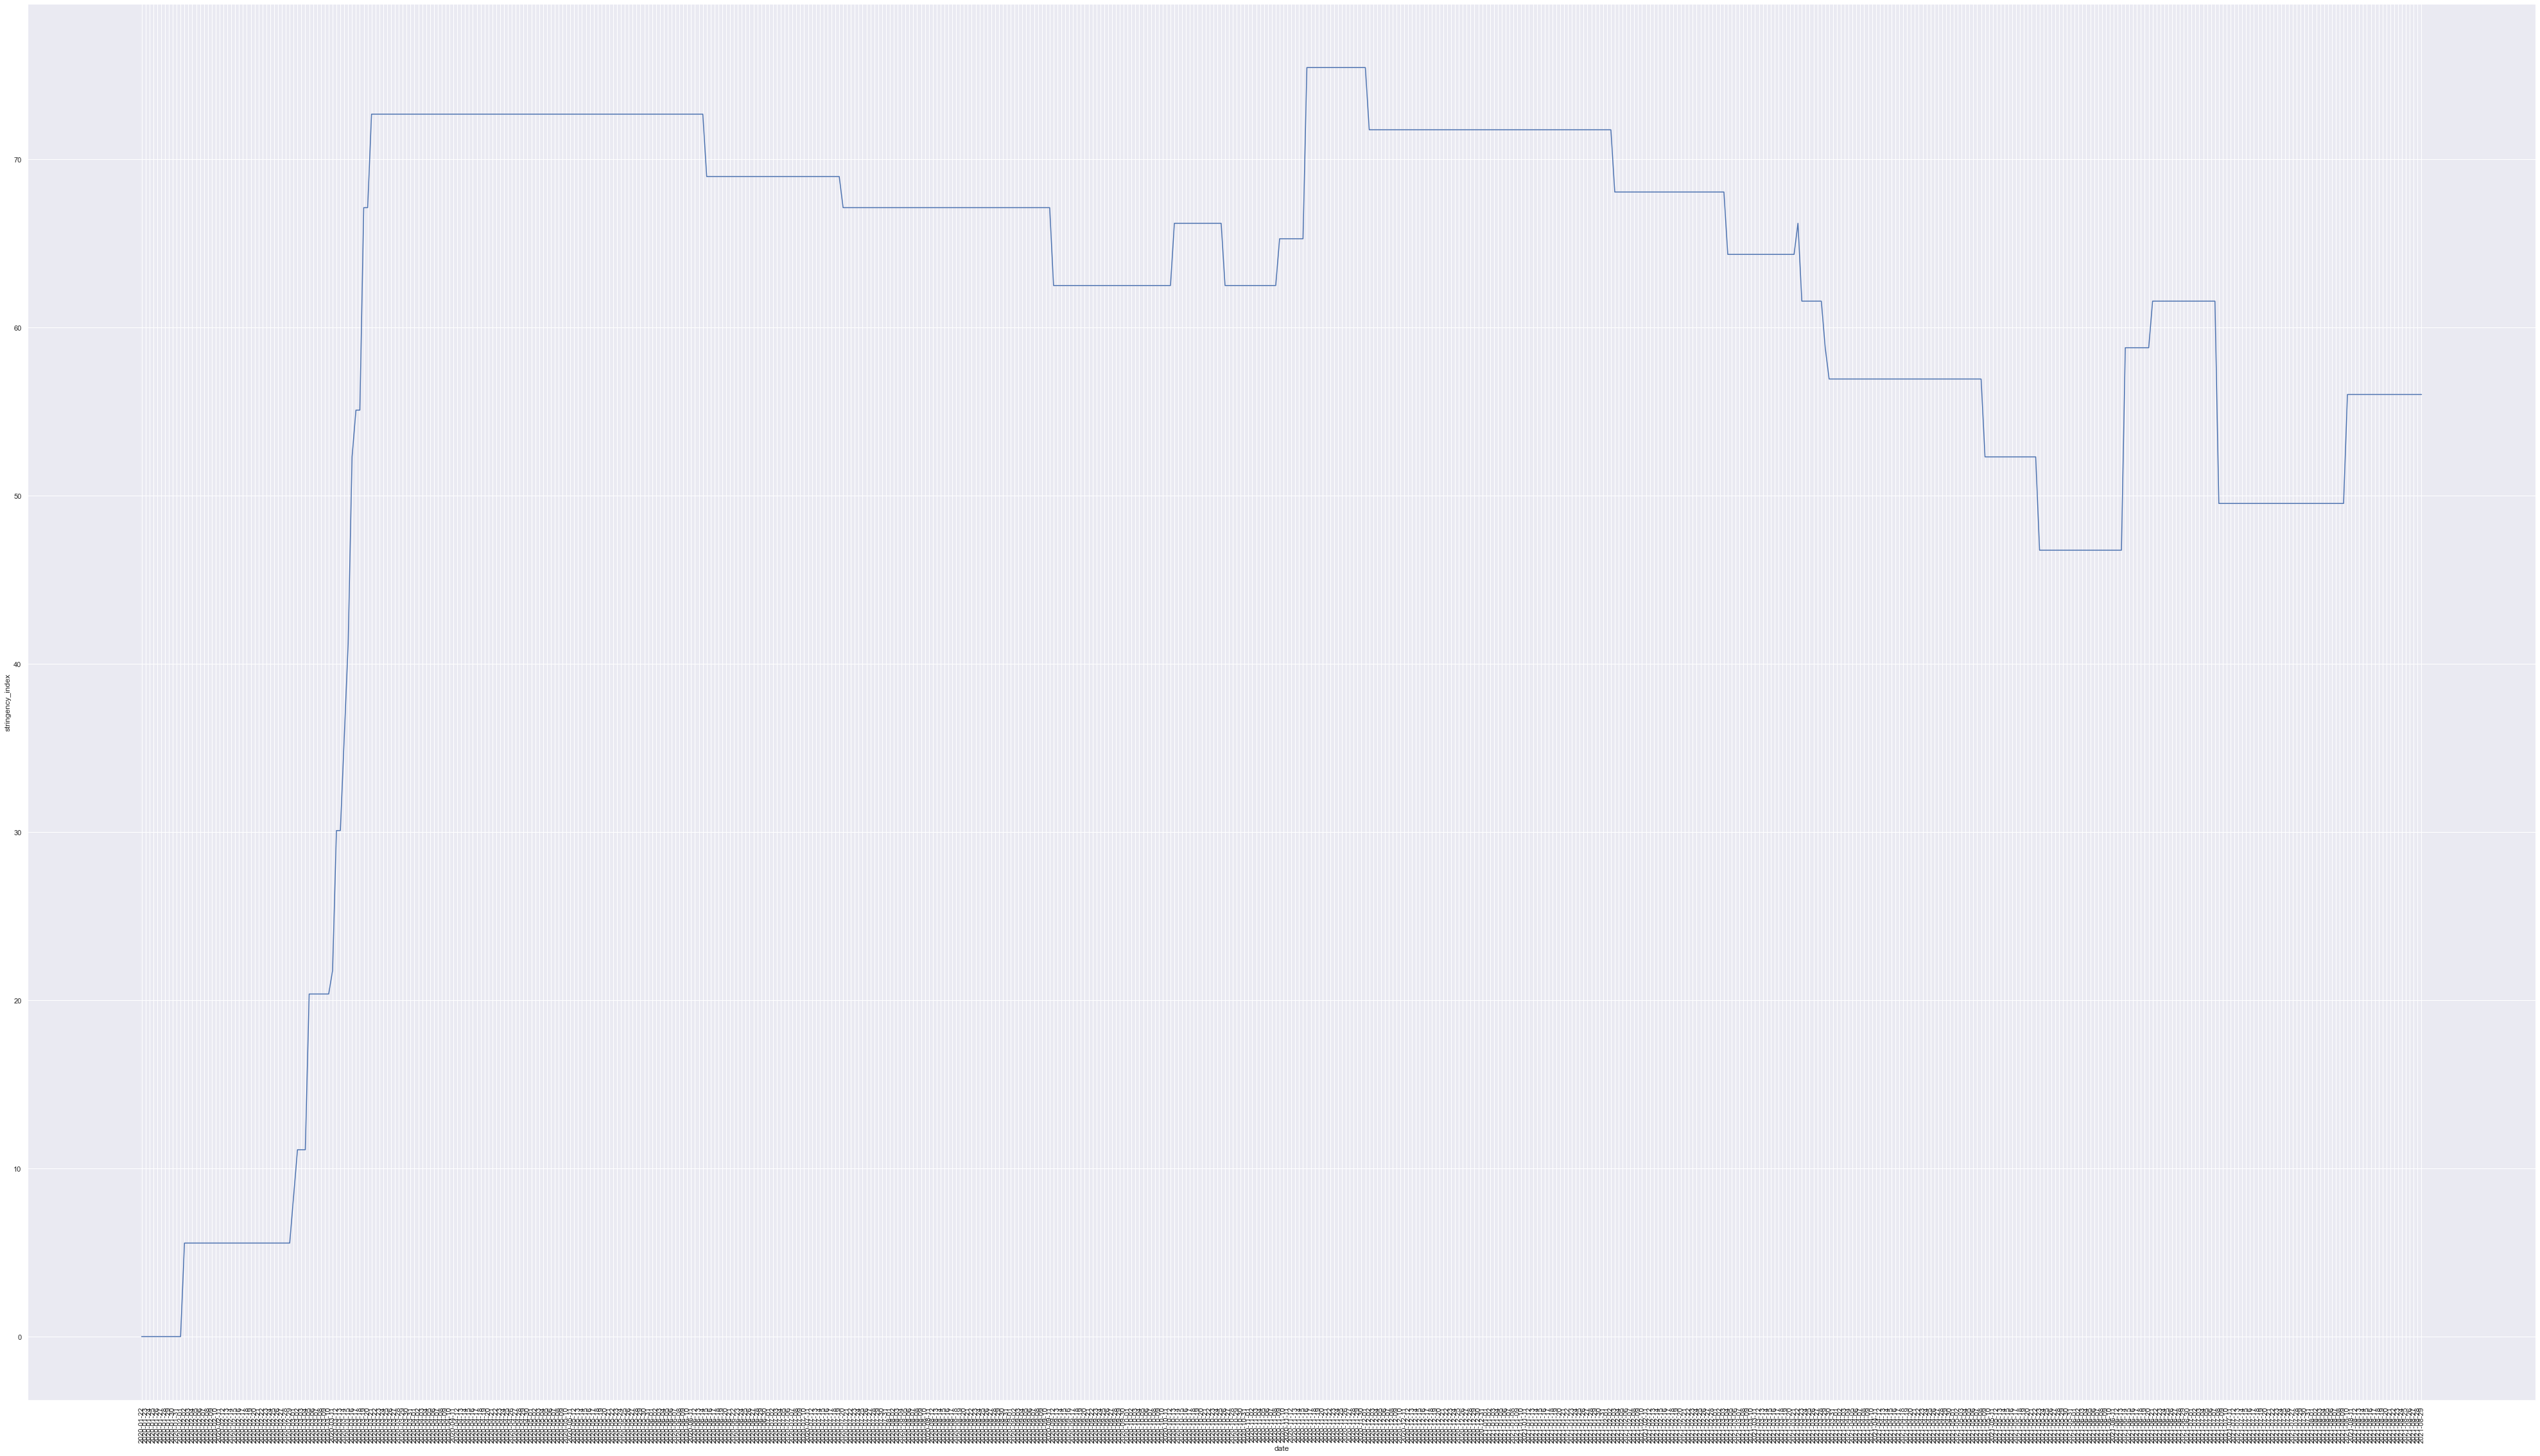

In [301]:
#stringency index of US
policy_US = policy[policy['location']=="United States"]
sns.set(rc={'figure.figsize':(70,40)})
sns.lineplot(x="date",y="stringency_index",data=policy_US)
plt.xticks(rotation=90)
plt.show()

# Countries with at least 50% vaccination (2nd dose)
 - Would use people_fully_vaccinated_per_hundred

In [323]:
#Querying people_fully_vaccinated_per_hundred final values for each country
people_fully_vaccinated_per_hundred = pd.concat([id, df_owid["people_fully_vaccinated_per_hundred"].to_frame()], axis=1)
each_country_people_fully_vaccinated_per_hundred = people_fully_vaccinated_per_hundred.dropna().drop_duplicates(subset="location", keep="last")
each_country_people_fully_vaccinated_per_hundred

,iso_code,continent,location,date,people_fully_vaccinated_per_hundred
543,AFG,Asia,Afghanistan,2021-08-20,1.08
1672,ALB,Europe,Albania,2021-08-29,21.78
2217,DZA,Africa,Algeria,2021-08-20,1.62
2760,AND,Europe,Andorra,2021-08-15,52.51
3300,AGO,Africa,Angola,2021-08-25,2.15
...,...,...,...,...,...
110998,VNM,Asia,Vietnam,2021-08-30,2.57
111153,WLF,Oceania,Wallis and Futuna,2021-08-23,43.06
112215,YEM,Asia,Yemen,2021-07-27,0.04
112781,ZMB,Africa,Zambia,2021-08-30,1.40


In [324]:
each_country_people_fully_vaccinated_per_hundred[each_country_people_fully_vaccinated_per_hundred["people_fully_vaccinated_per_hundred"]>50]
#Confirmed that Andorra and US both have 50+% fully vaccination rate as of today

,iso_code,continent,location,date,people_fully_vaccinated_per_hundred
2760,AND,Europe,Andorra,2021-08-15,52.51
3504,AIA,North America,Anguilla,2021-08-20,59.27
5354,ABW,North America,Aruba,2021-08-30,64.51
7079,AUT,Europe,Austria,2021-08-30,57.46
8717,BHR,Asia,Bahrain,2021-08-30,62.20
10923,BEL,Europe,Belgium,2021-08-30,69.64
12215,BMU,North America,Bermuda,2021-08-27,67.52
12750,BTN,Asia,Bhutan,2021-08-22,60.96
18868,CAN,North America,Canada,2021-08-30,66.62
19646,CYM,North America,Cayman Islands,2021-08-29,73.97


In [338]:
people_fully_vaccinated_per_hundred[people_fully_vaccinated_per_hundred["location"]=="Andorra"].dropna()

,iso_code,continent,location,date,people_fully_vaccinated_per_hundred
2600,AND,Europe,Andorra,2021-03-08,1.52
2602,AND,Europe,Andorra,2021-03-10,1.63
2607,AND,Europe,Andorra,2021-03-15,1.64
2628,AND,Europe,Andorra,2021-04-05,5.80
2642,AND,Europe,Andorra,2021-04-19,6.05
2649,AND,Europe,Andorra,2021-04-26,6.05
2656,AND,Europe,Andorra,2021-05-03,6.07
2663,AND,Europe,Andorra,2021-05-10,6.08
2670,AND,Europe,Andorra,2021-05-17,6.08
2684,AND,Europe,Andorra,2021-05-31,10.73


In [344]:
people_fully_vaccinated_per_hundred_US = people_fully_vaccinated_per_hundred[people_fully_vaccinated_per_hundred["location"]=="United States"].dropna()
people_fully_vaccinated_per_hundred_US[people_fully_vaccinated_per_hundred_US["people_fully_vaccinated_per_hundred"]>49]

,iso_code,continent,location,date,people_fully_vaccinated_per_hundred
107936,USA,North America,United States,2021-08-02,49.04
107937,USA,North America,United States,2021-08-03,49.08
107938,USA,North America,United States,2021-08-04,49.16
107939,USA,North America,United States,2021-08-05,49.25
107940,USA,North America,United States,2021-08-06,49.33
107941,USA,North America,United States,2021-08-07,49.42
107942,USA,North America,United States,2021-08-08,49.50
107943,USA,North America,United States,2021-08-09,49.55
107944,USA,North America,United States,2021-08-10,49.61
107945,USA,North America,United States,2021-08-11,49.69


In [345]:
#Lets go back to Andorra's case and figure when the country passed 50% of full doses rates.
#As of 2021-08-01, Andorra passed 50% of people_fully_vaccinated_per_hundred rate

#As of 2021-08-14, US passed 50% of people_fully_vaccinated_per_hundred rate
#But, for some reason, new_case in US still skyrockets after 2021-08-14.
#Let's use the time serieses to further analyze this 